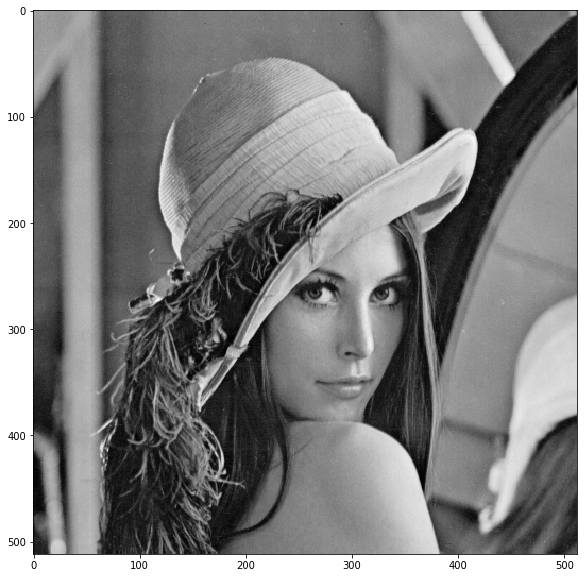

In [22]:
# Get an image

import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as st

HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
plt.figure(figsize = (10,10))
plt.imshow(Y, cmap="gray")

In [23]:
def show(img):
    plt.figure(figsize = (30,30))
    plt.imshow(img, cmap="gray")

In [45]:
# Wavelet machinery

import pywt

# Sólo por ver los distintos filtros que hay disponibles
print (pywt.wavelist())

# Seleccionamos una en concreto 
#wavelet = 'db9' # http://wavelets.pybytes.com/wavelet/db9/
wavelet = 'db5' # http://wavelets.pybytes.com/wavelet/db9/
#wavelet = 'haar'
#wavelet='rbio3.5'
#wavelet='rbio1.1'
#wavelet='bior3.5'
mode='per'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

In [46]:
levels = 5
H = levels*[None]
L = Y
for l in range(levels):
    L, H[l] = pywt.dwt2(L, wavelet, mode)

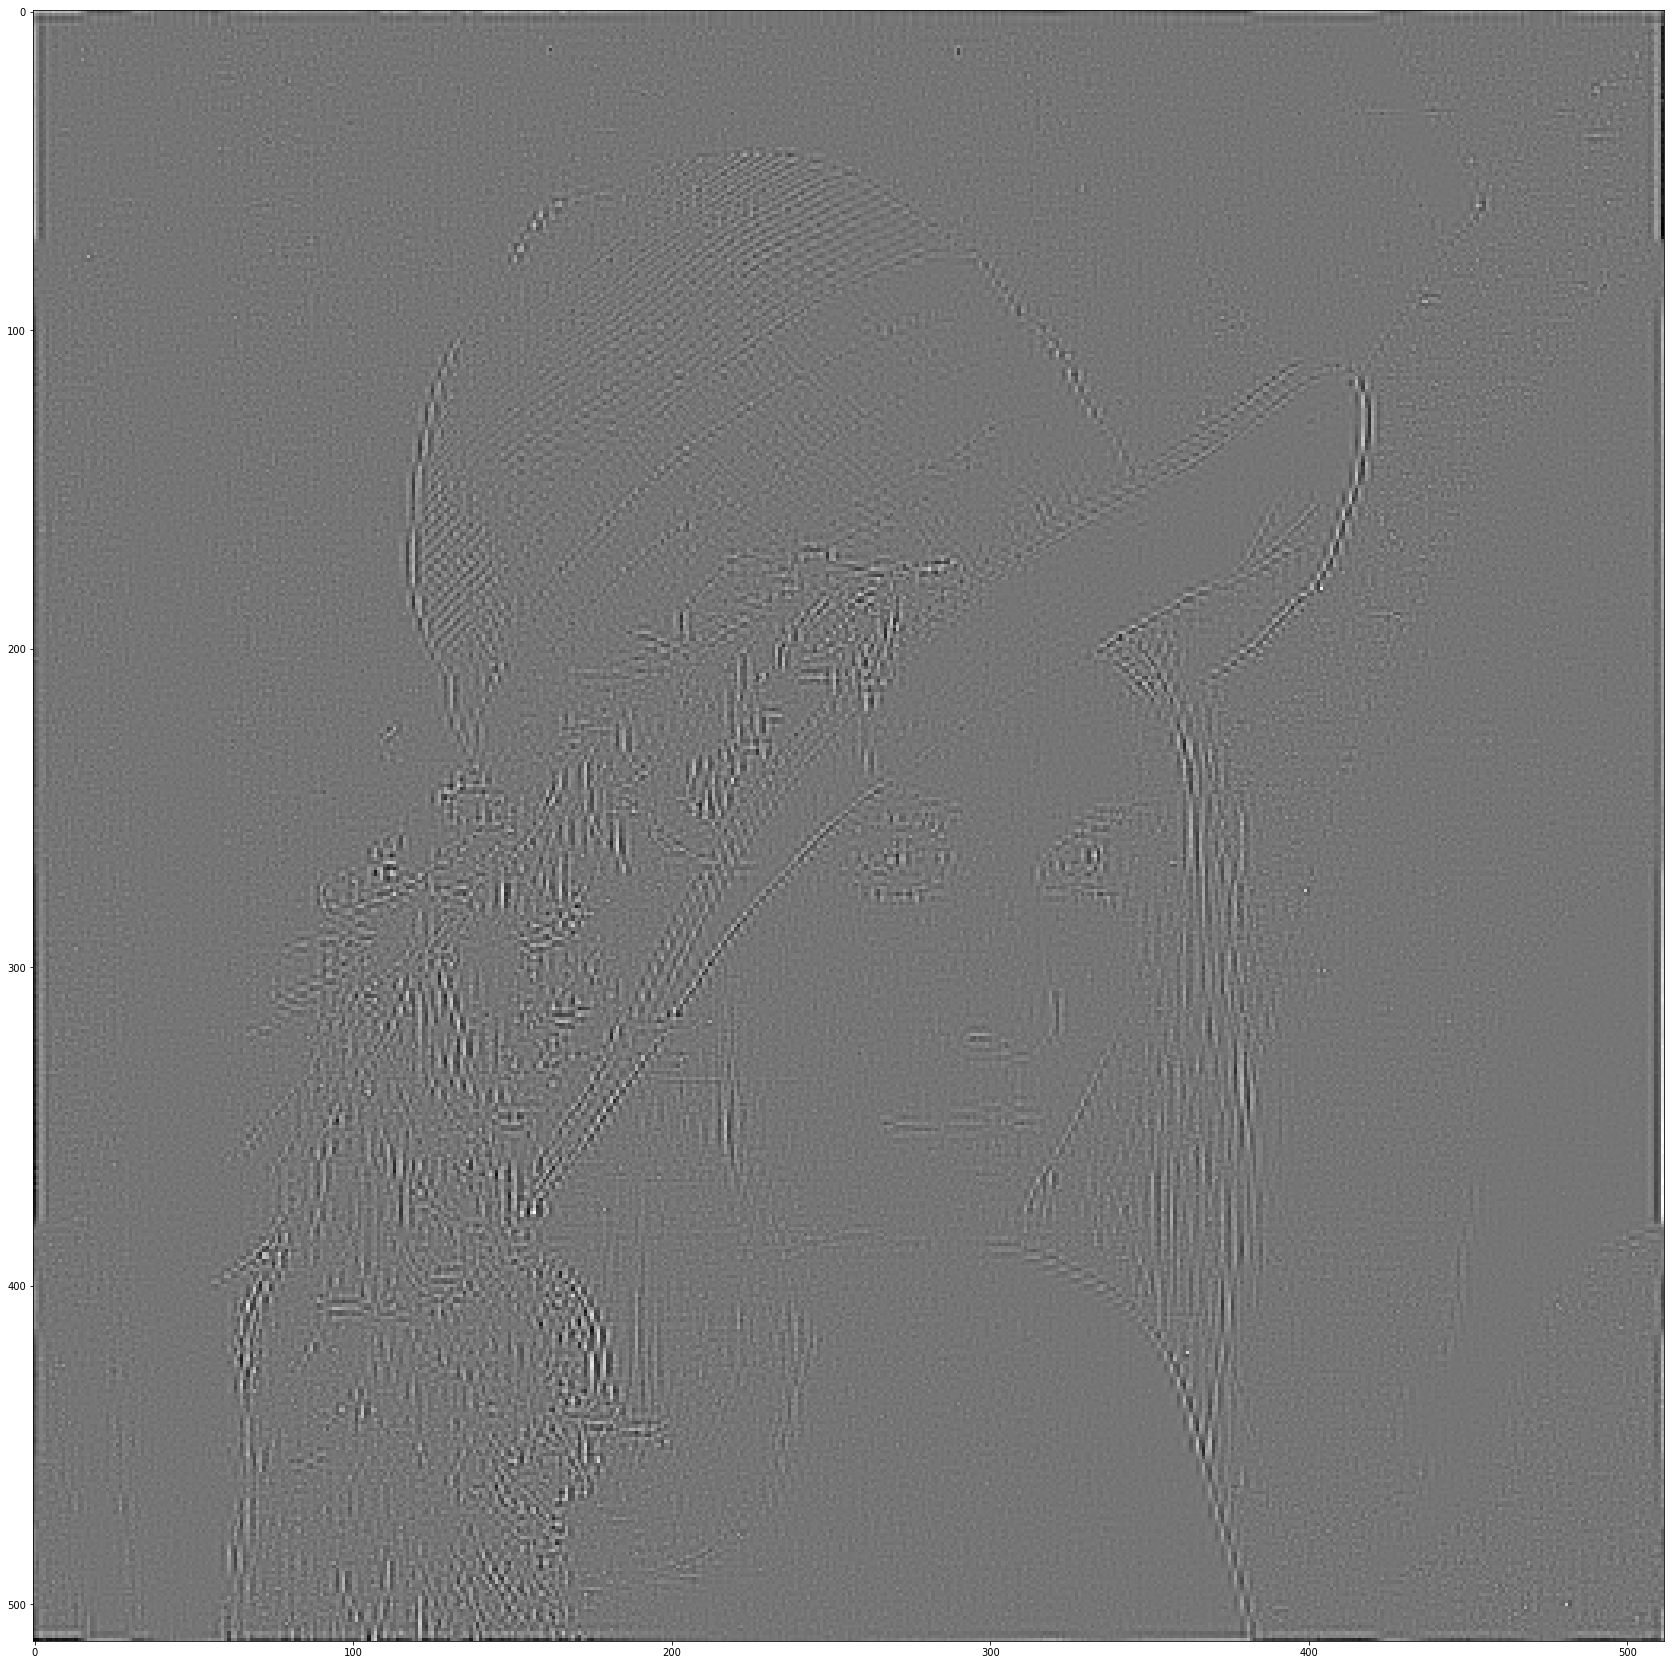

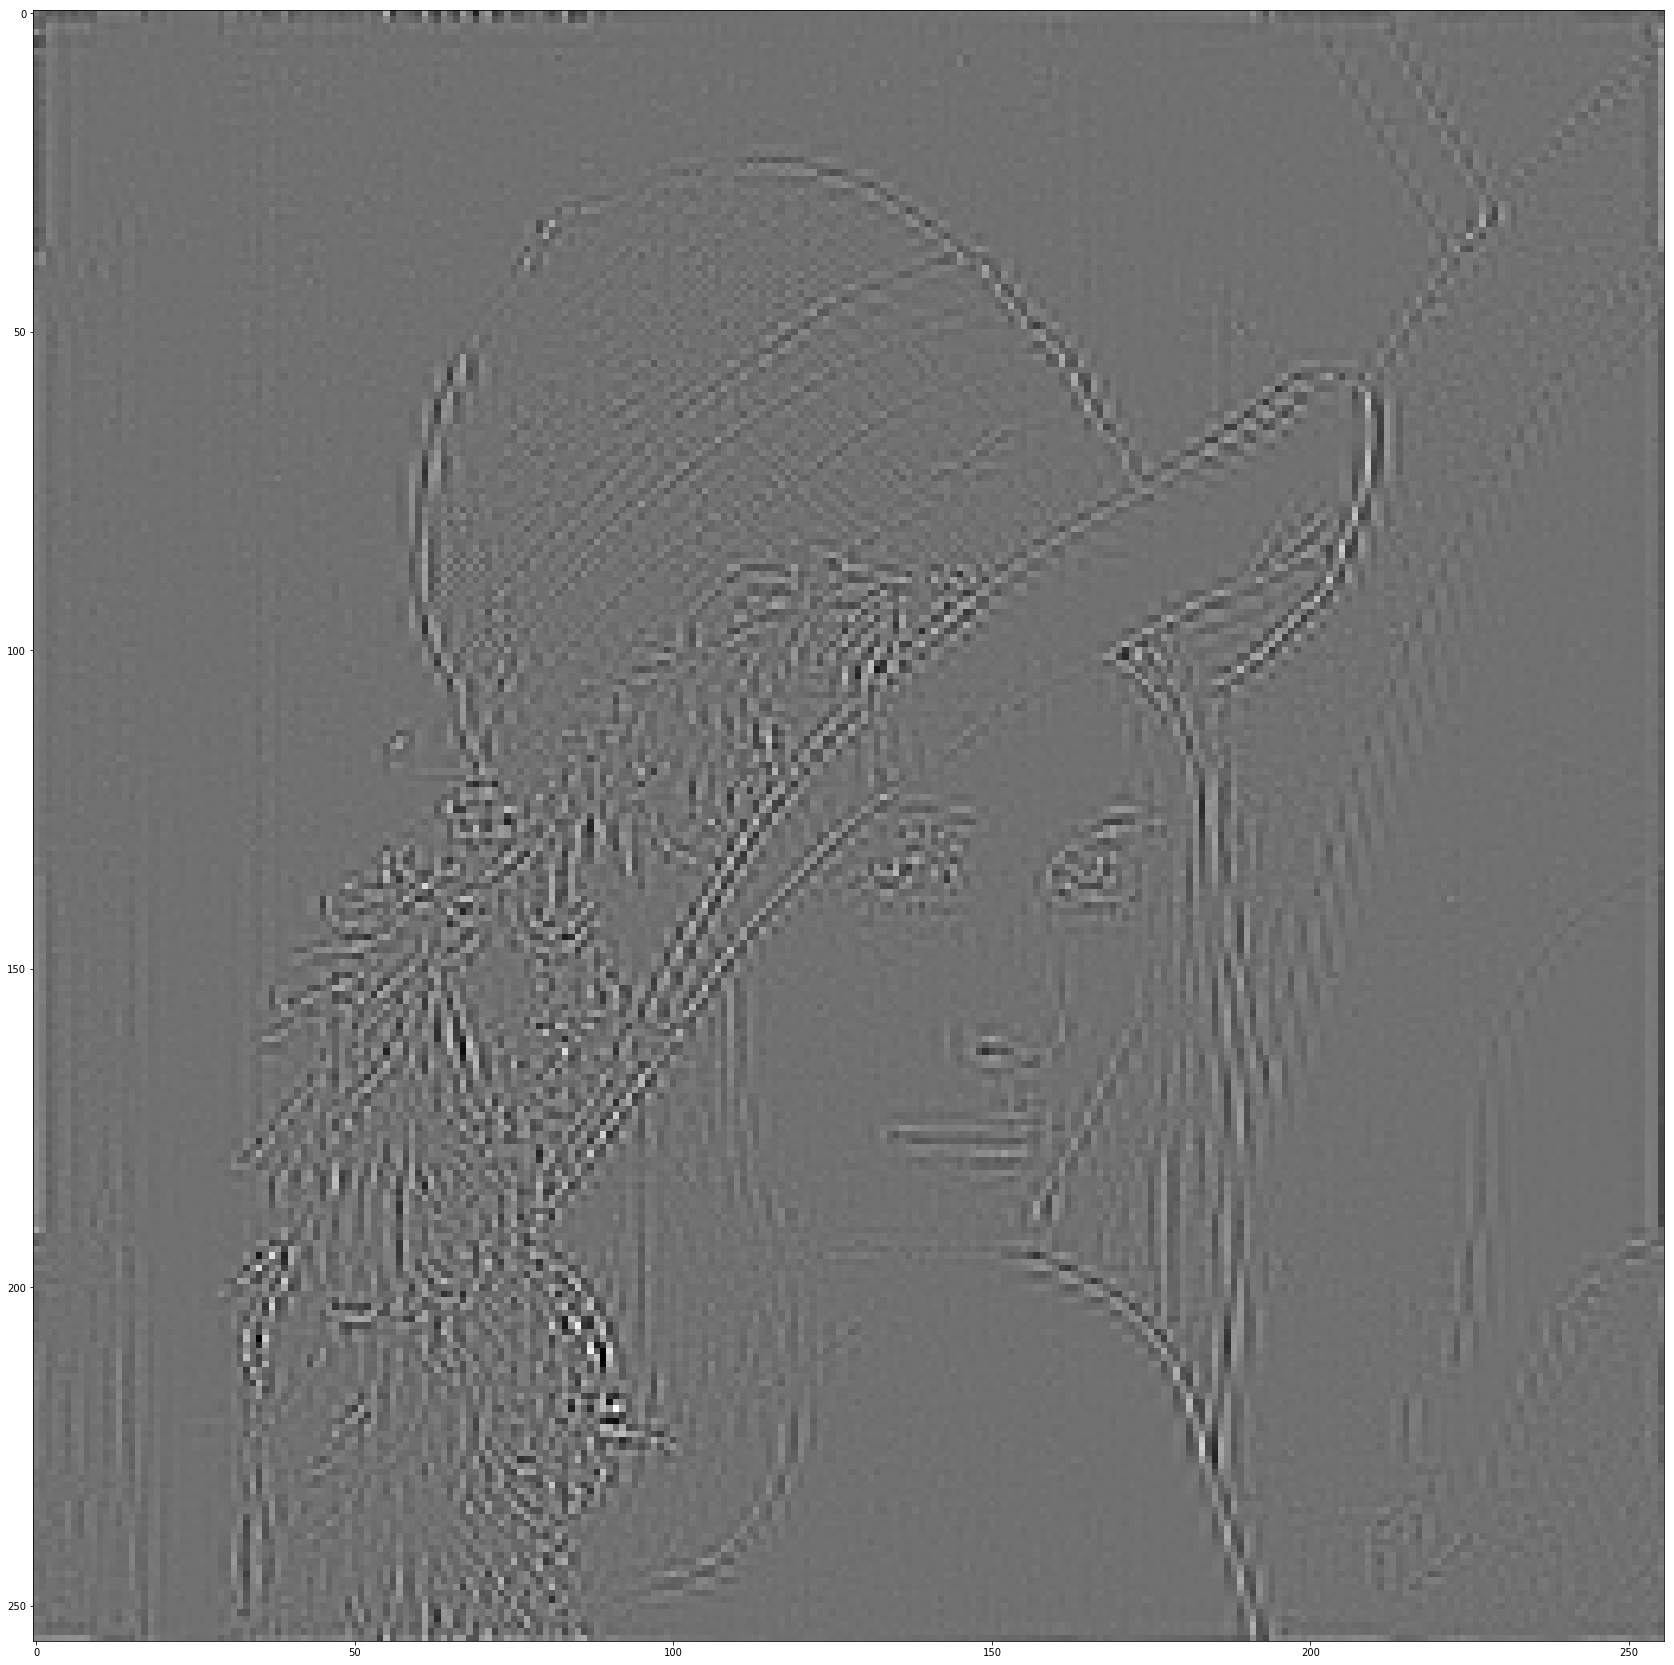

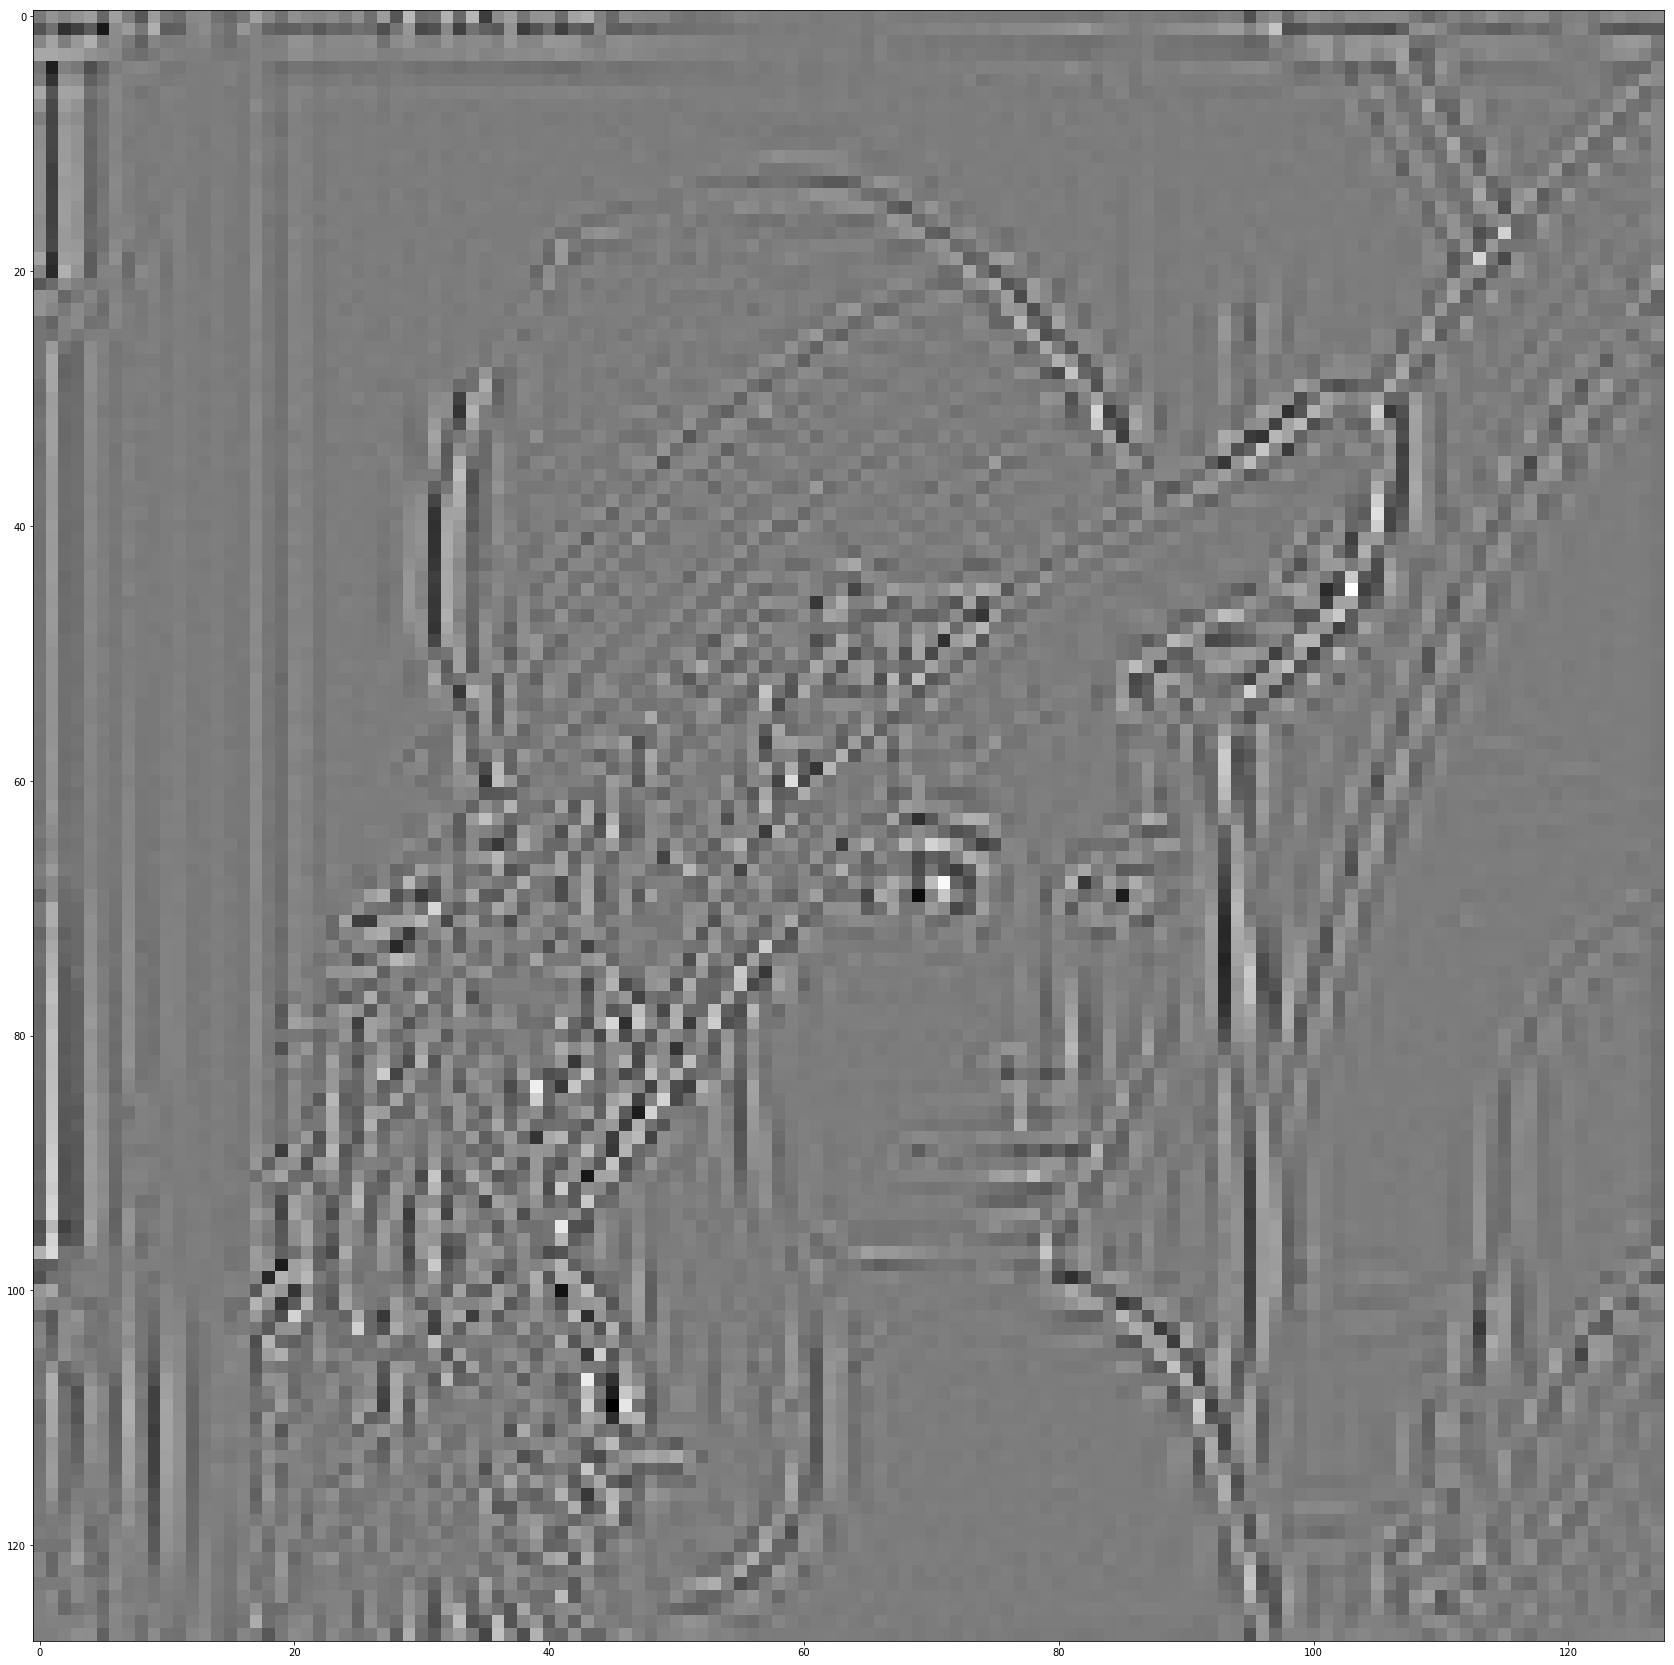

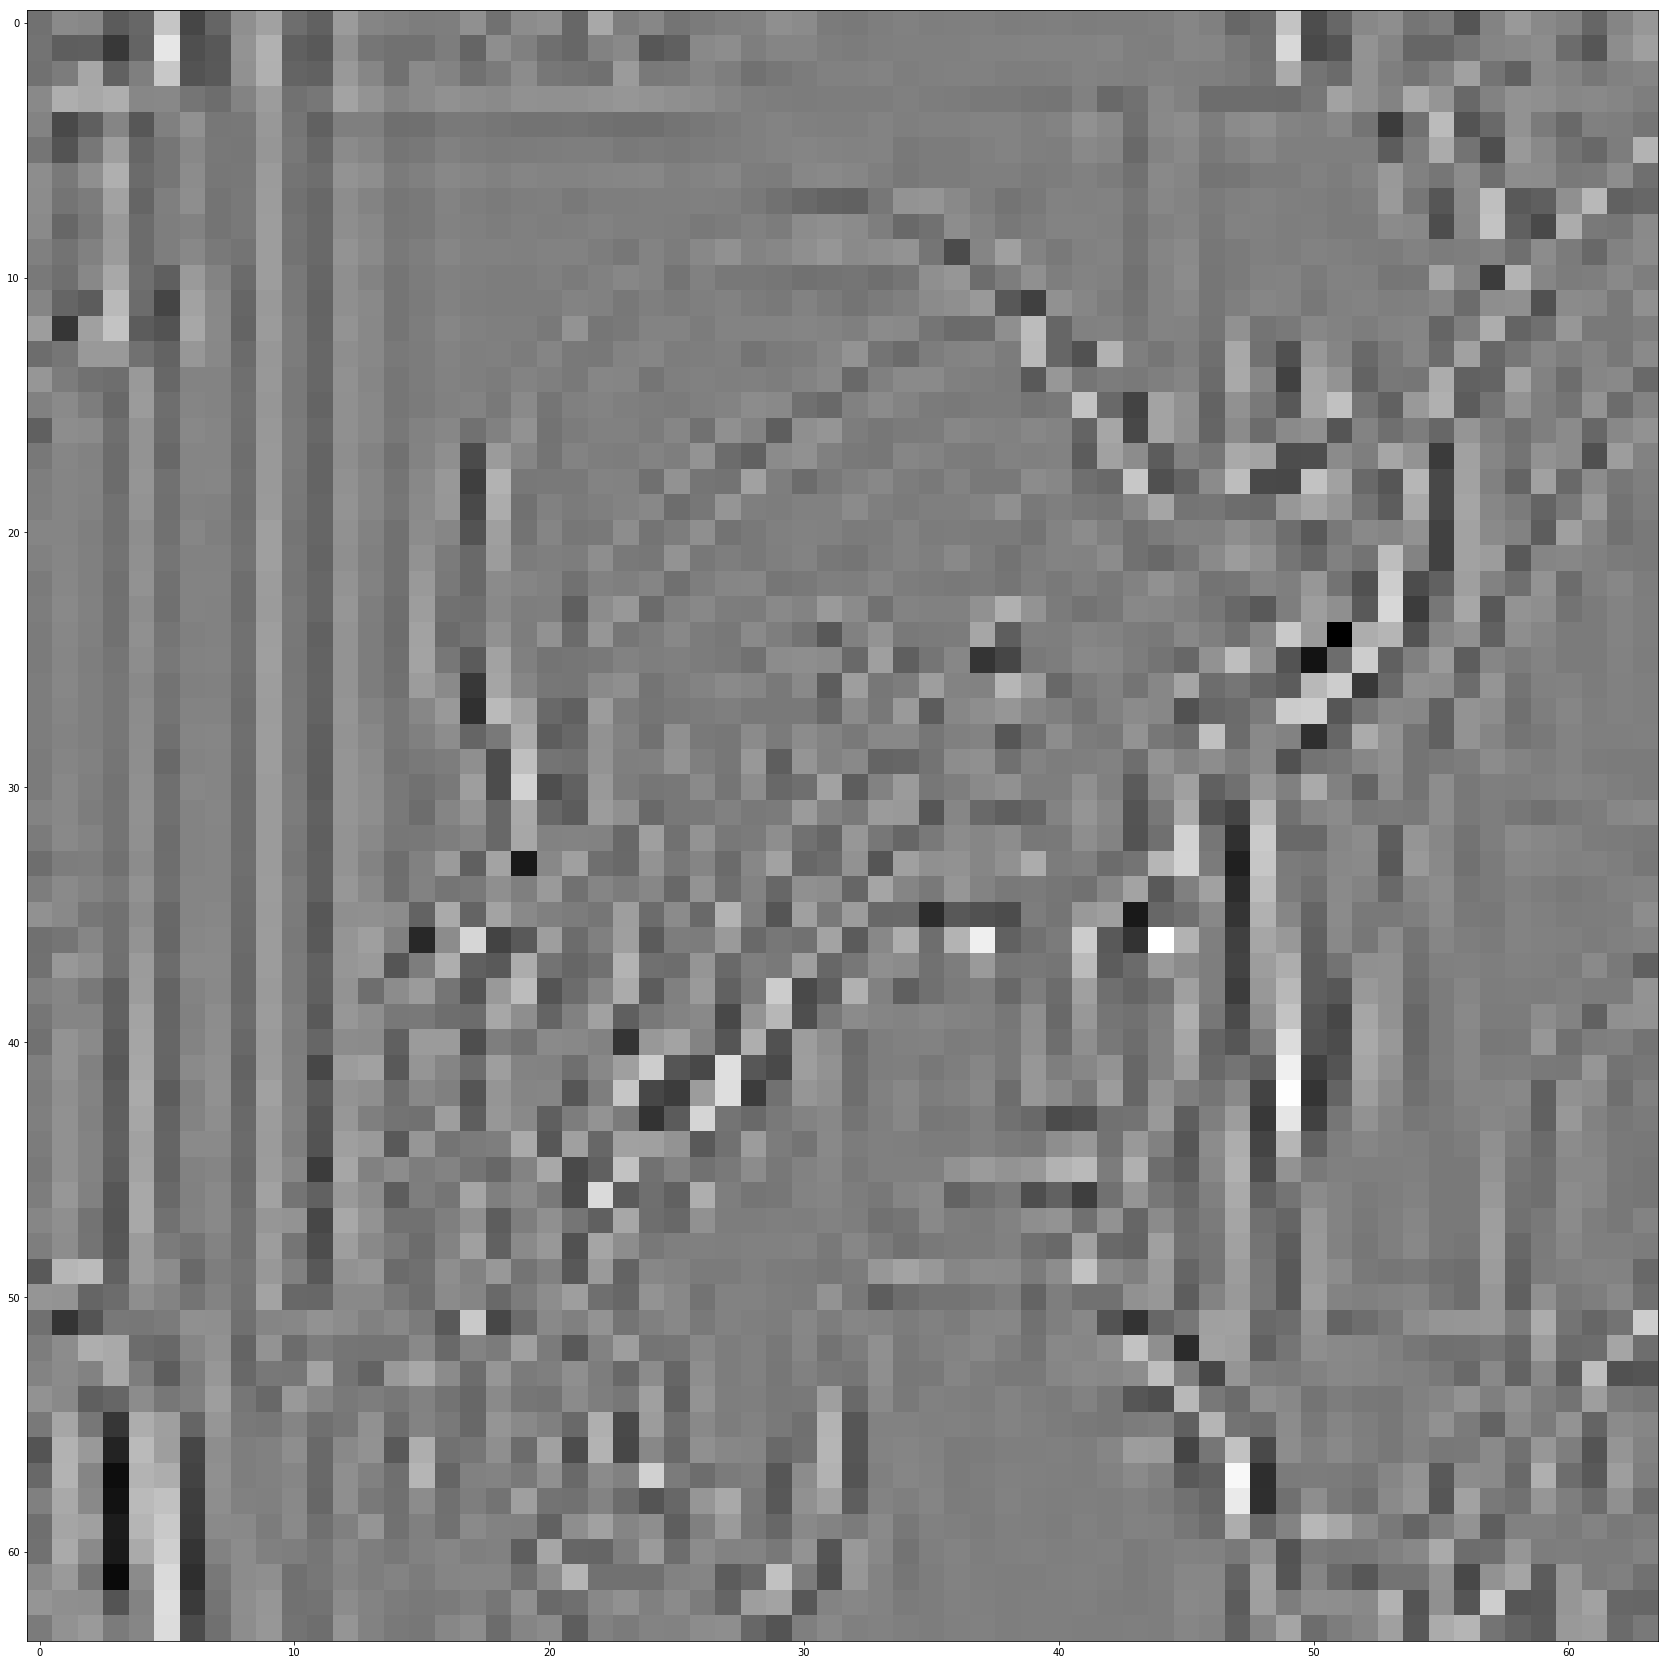

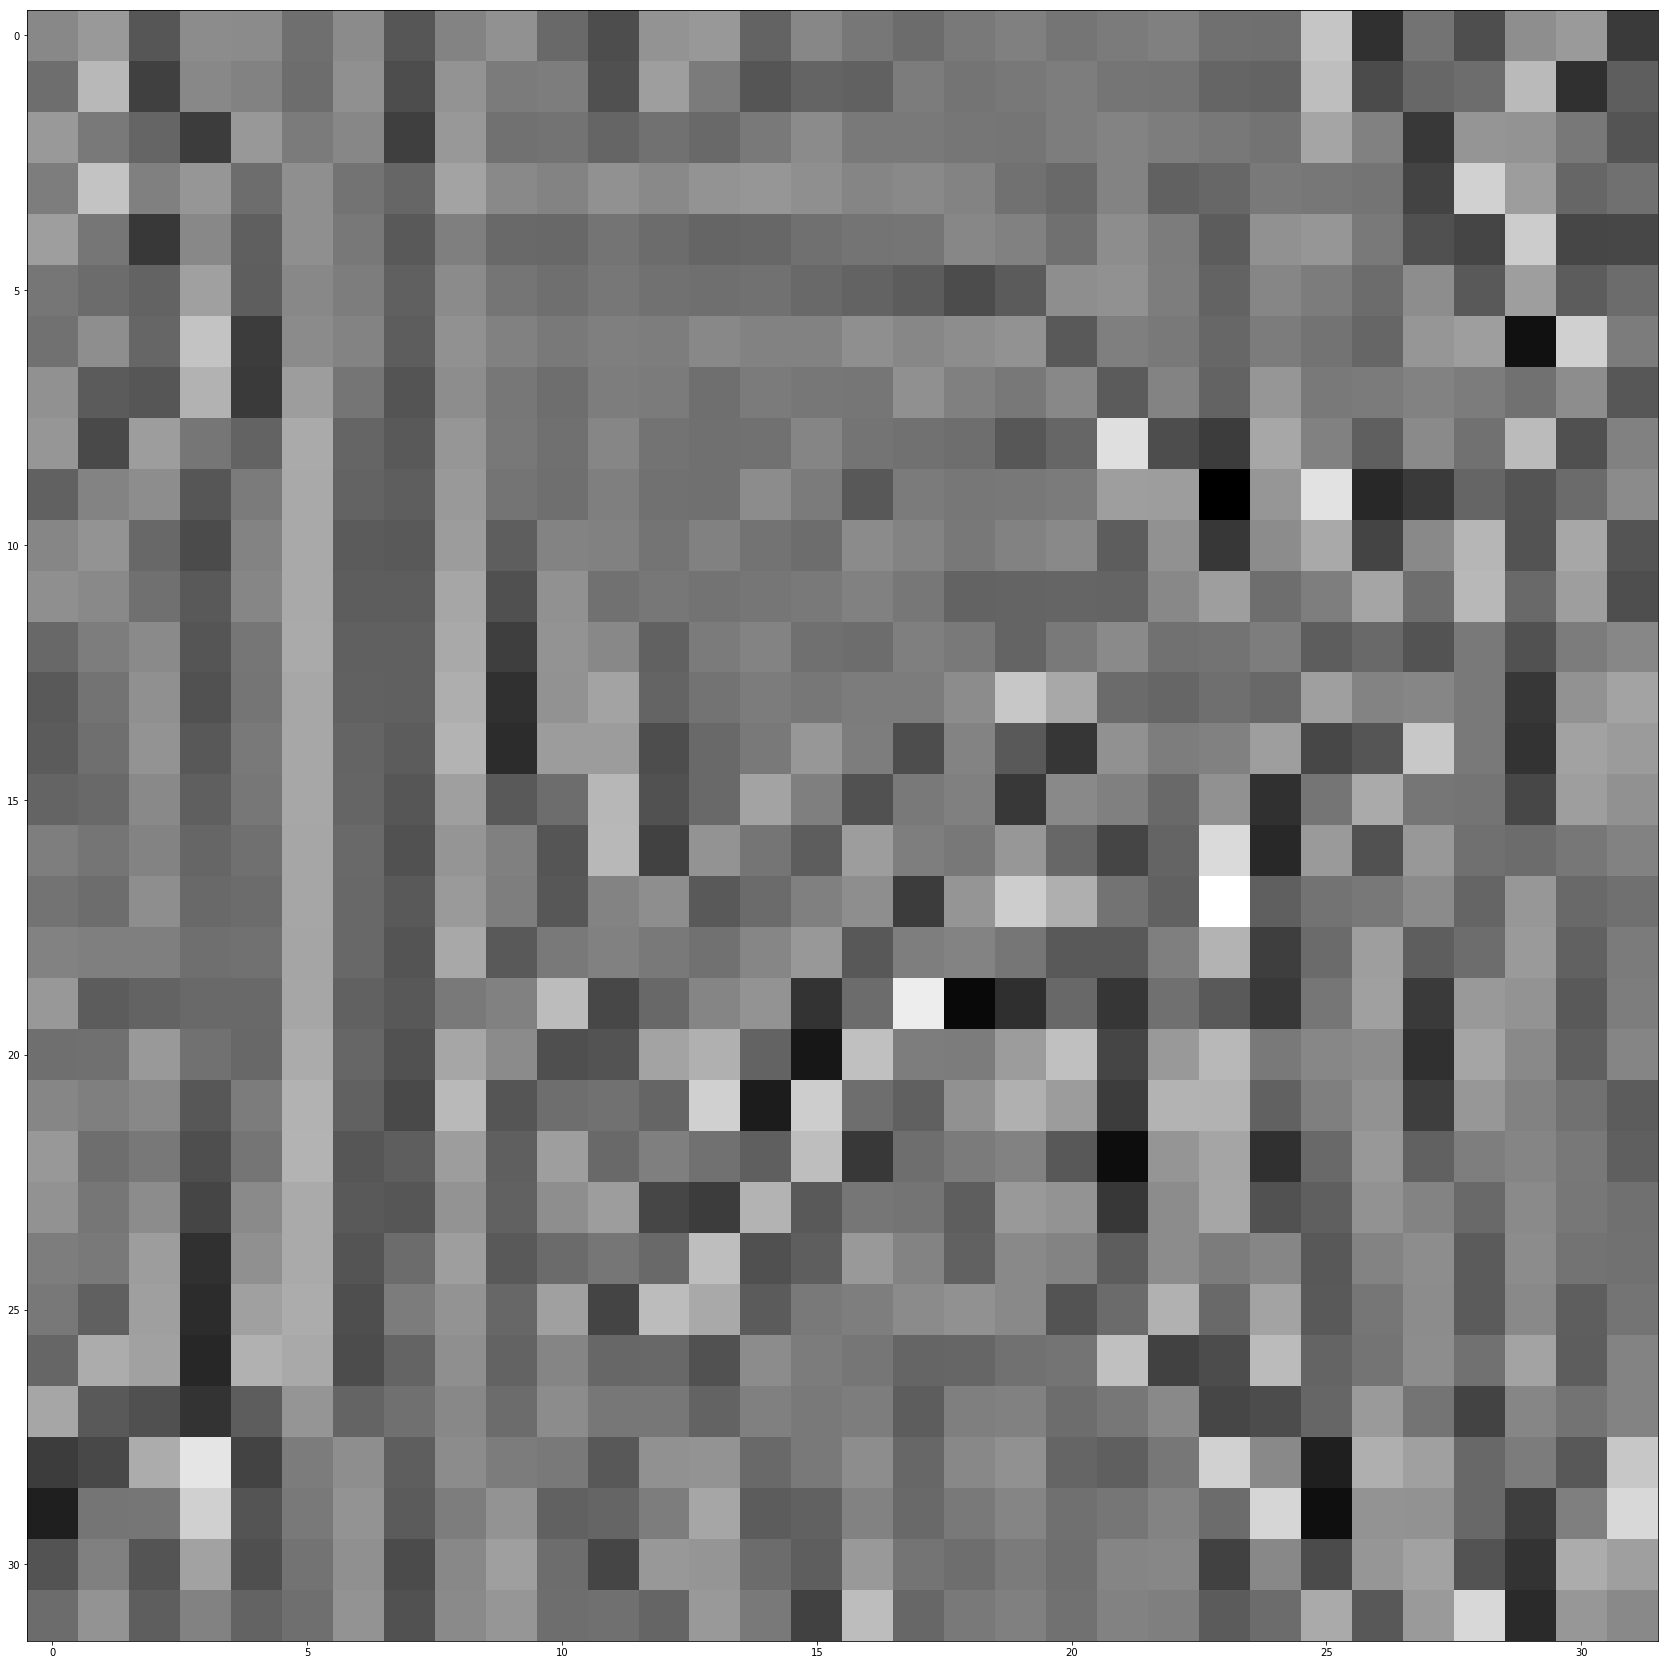

In [47]:
# H pyramid
_H_ = levels*[None]
for l in range(levels):
    zero = np.zeros(H[l][0].shape, np.float32)
    _H_[l] = pywt.idwt2((zero, H[l]), wavelet, mode)
    show(_H_[l])

1 0
2 0
2 1
3 0
3 1
3 2
4 0
4 1
4 2
4 3


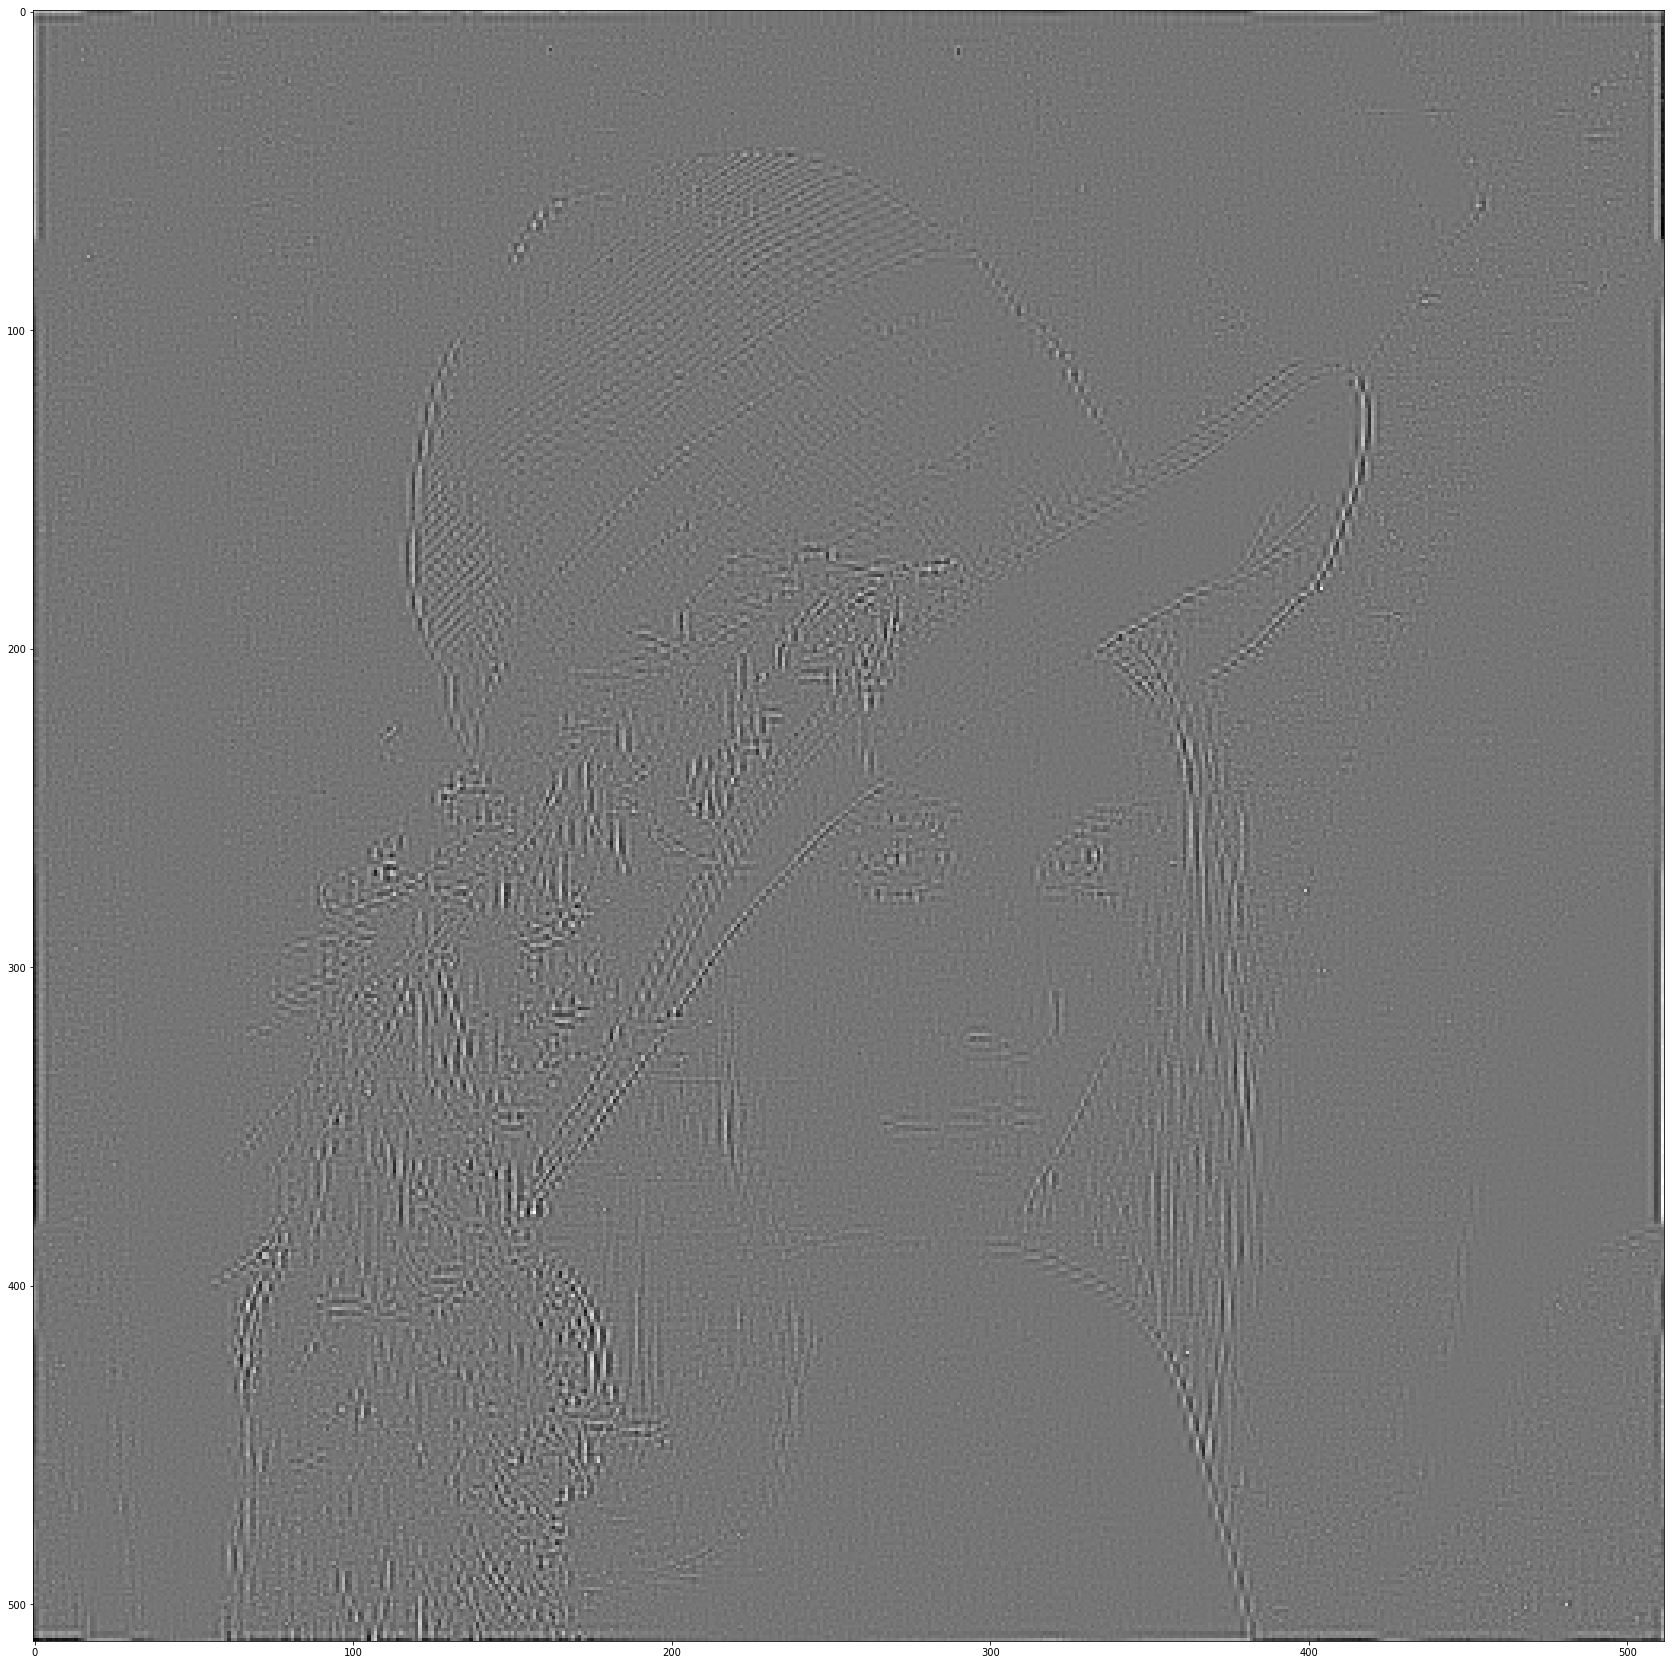

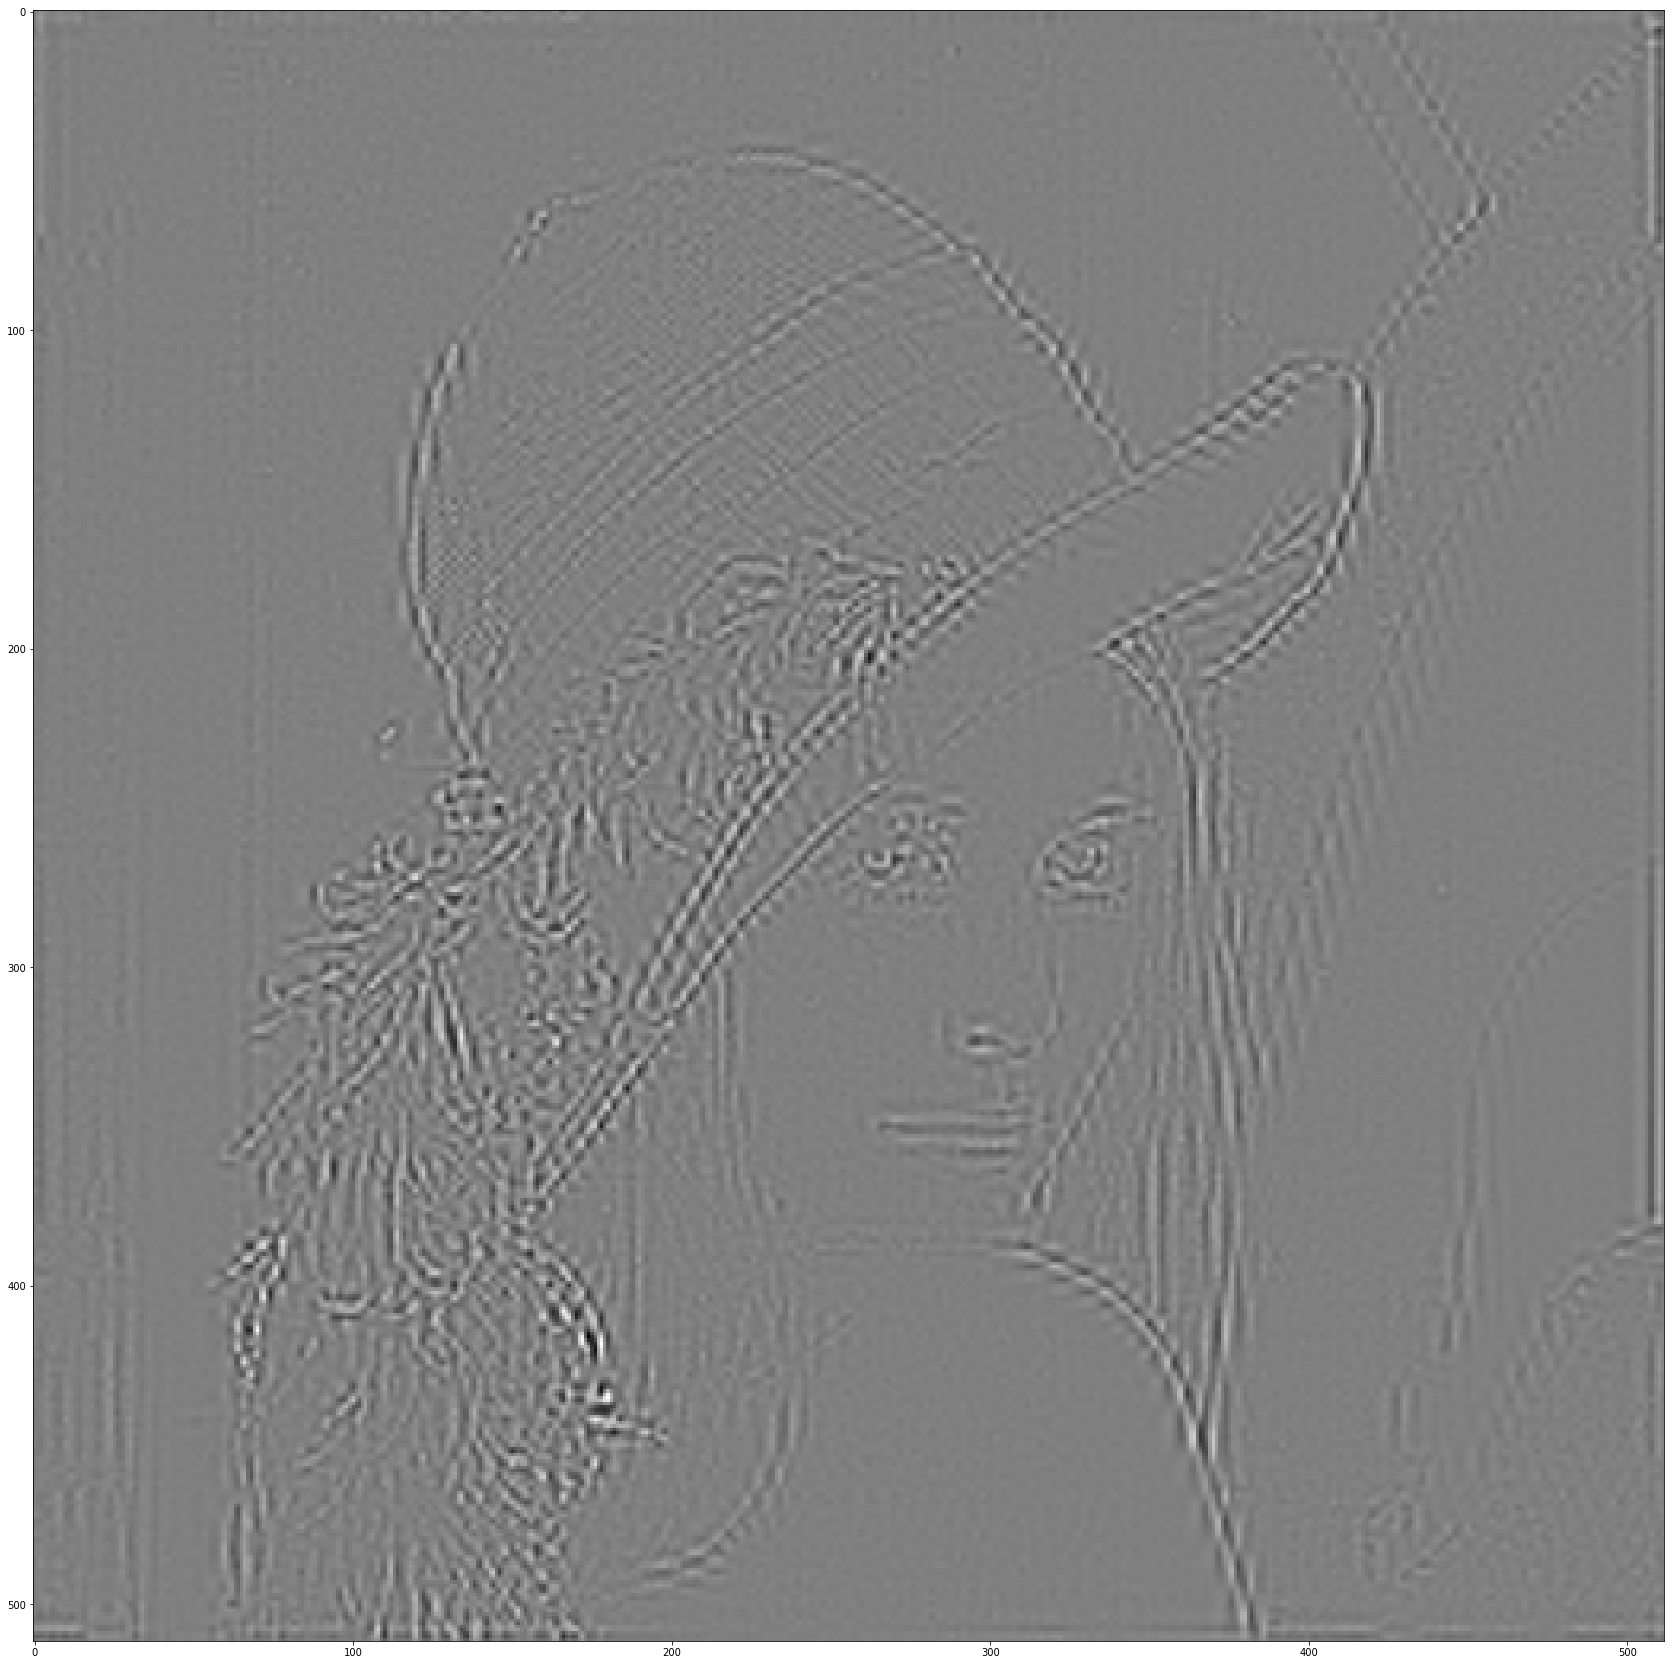

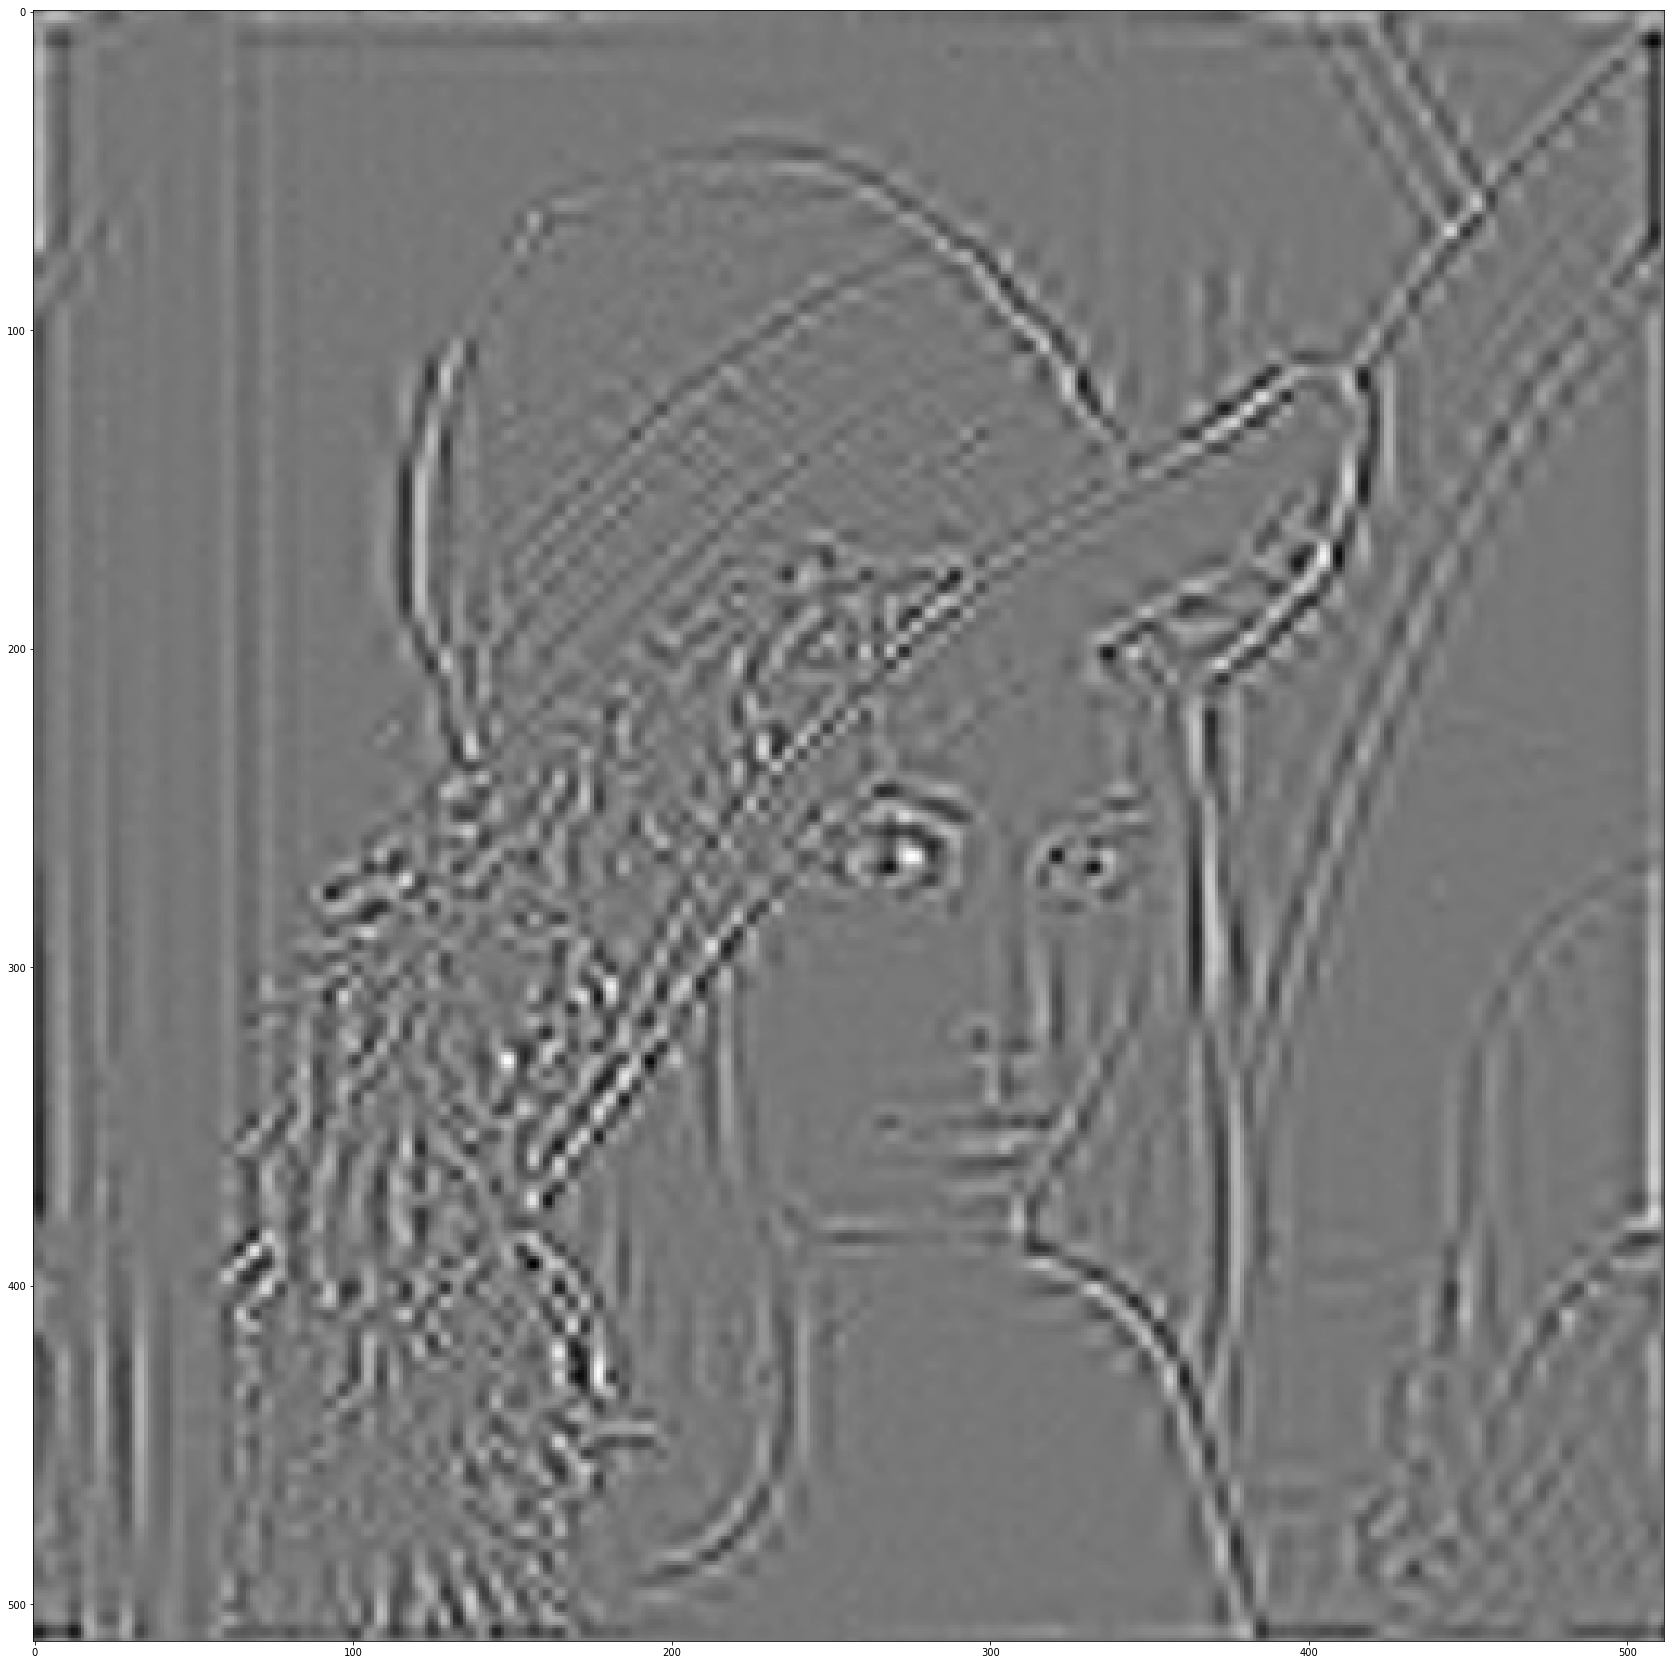

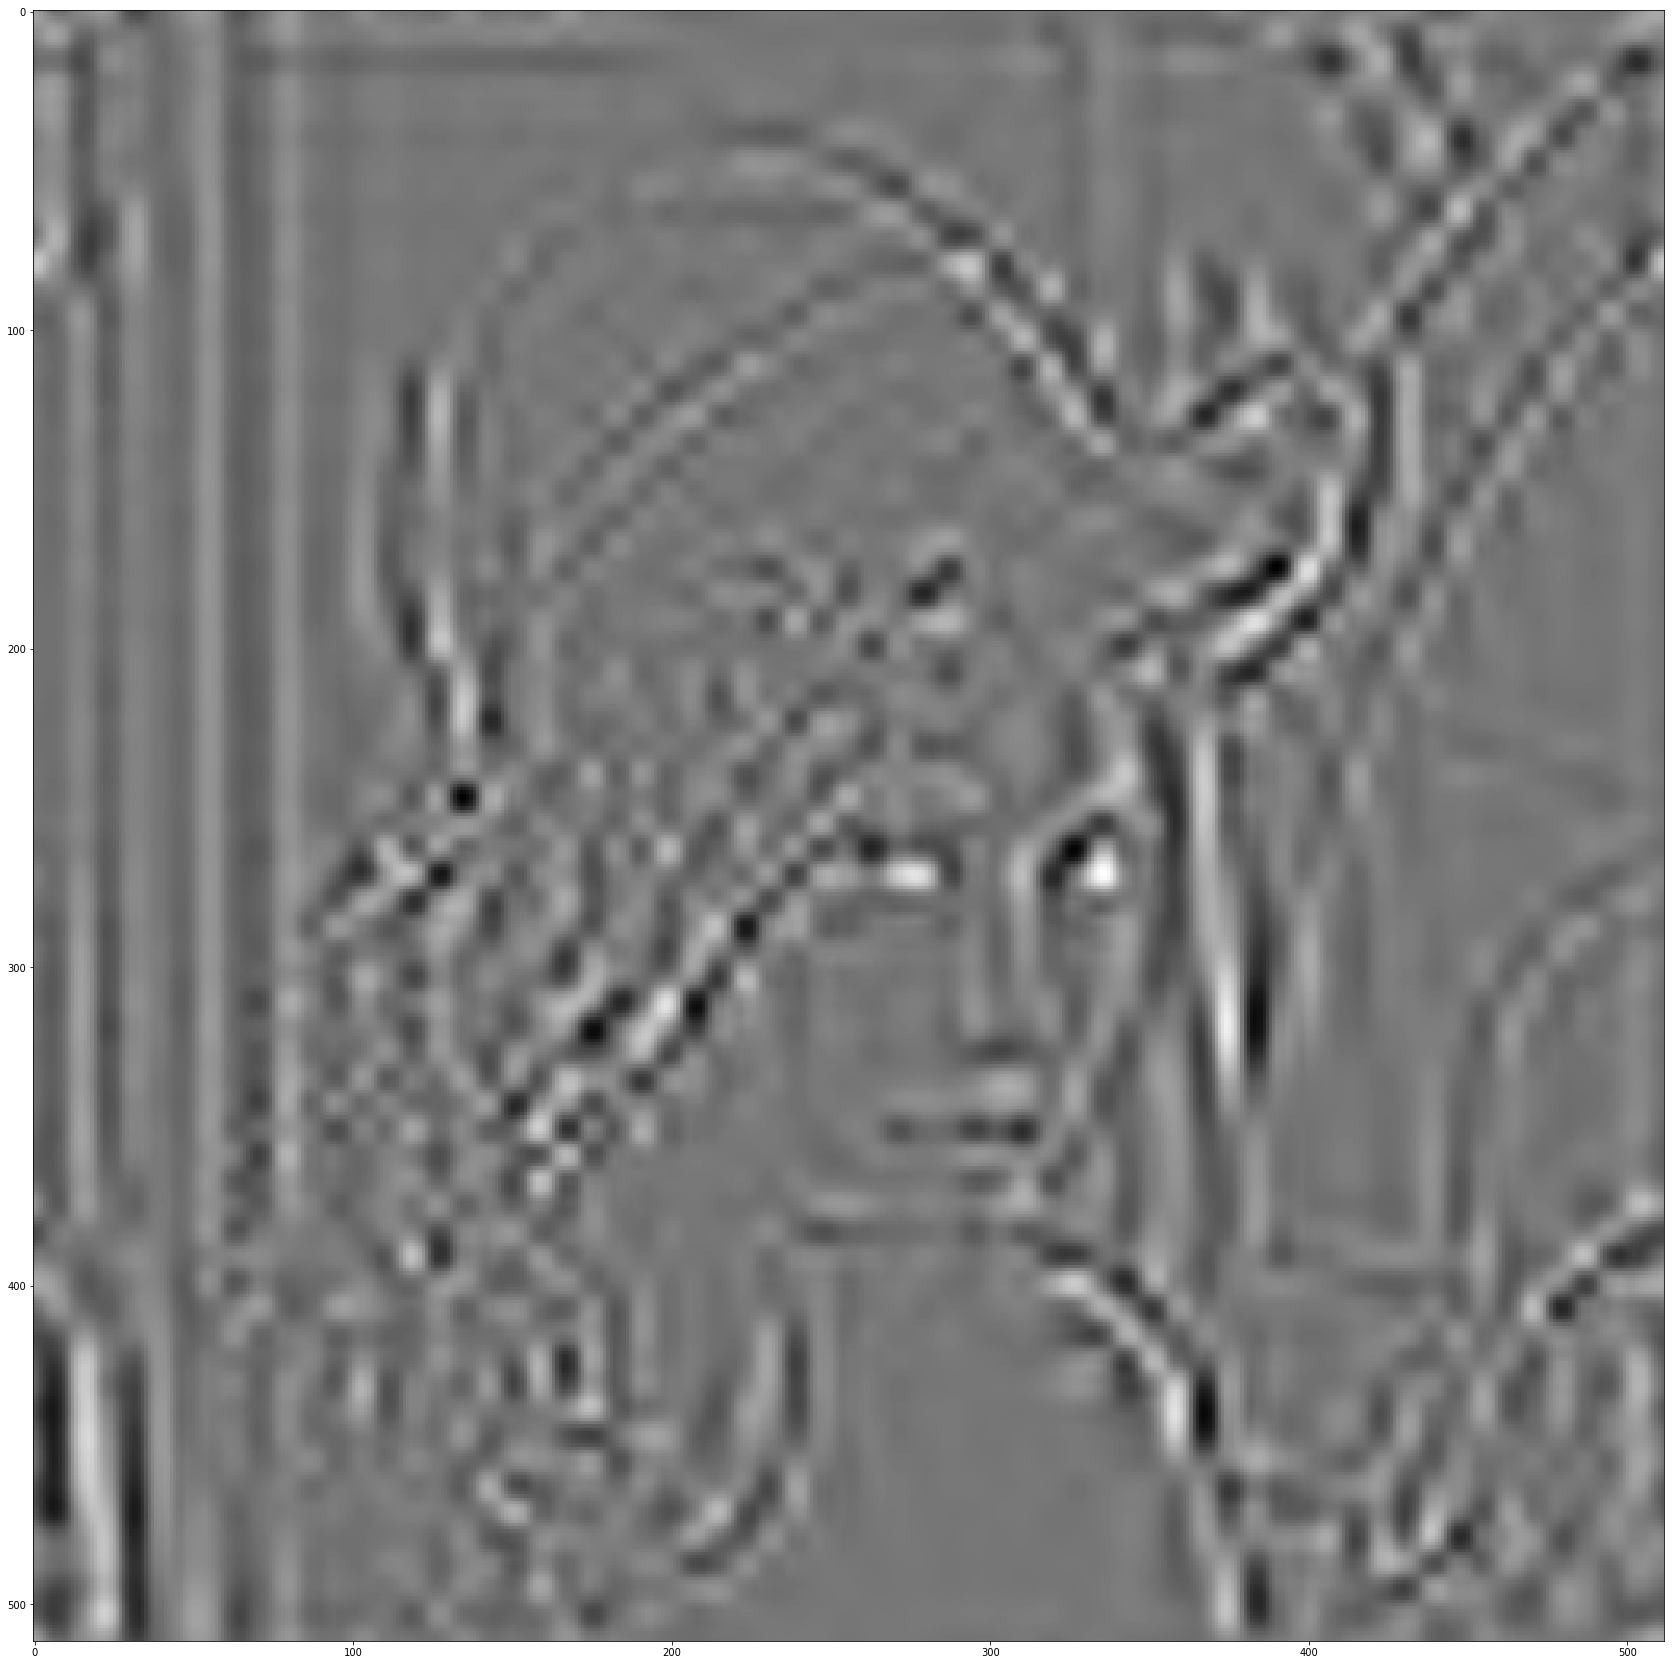

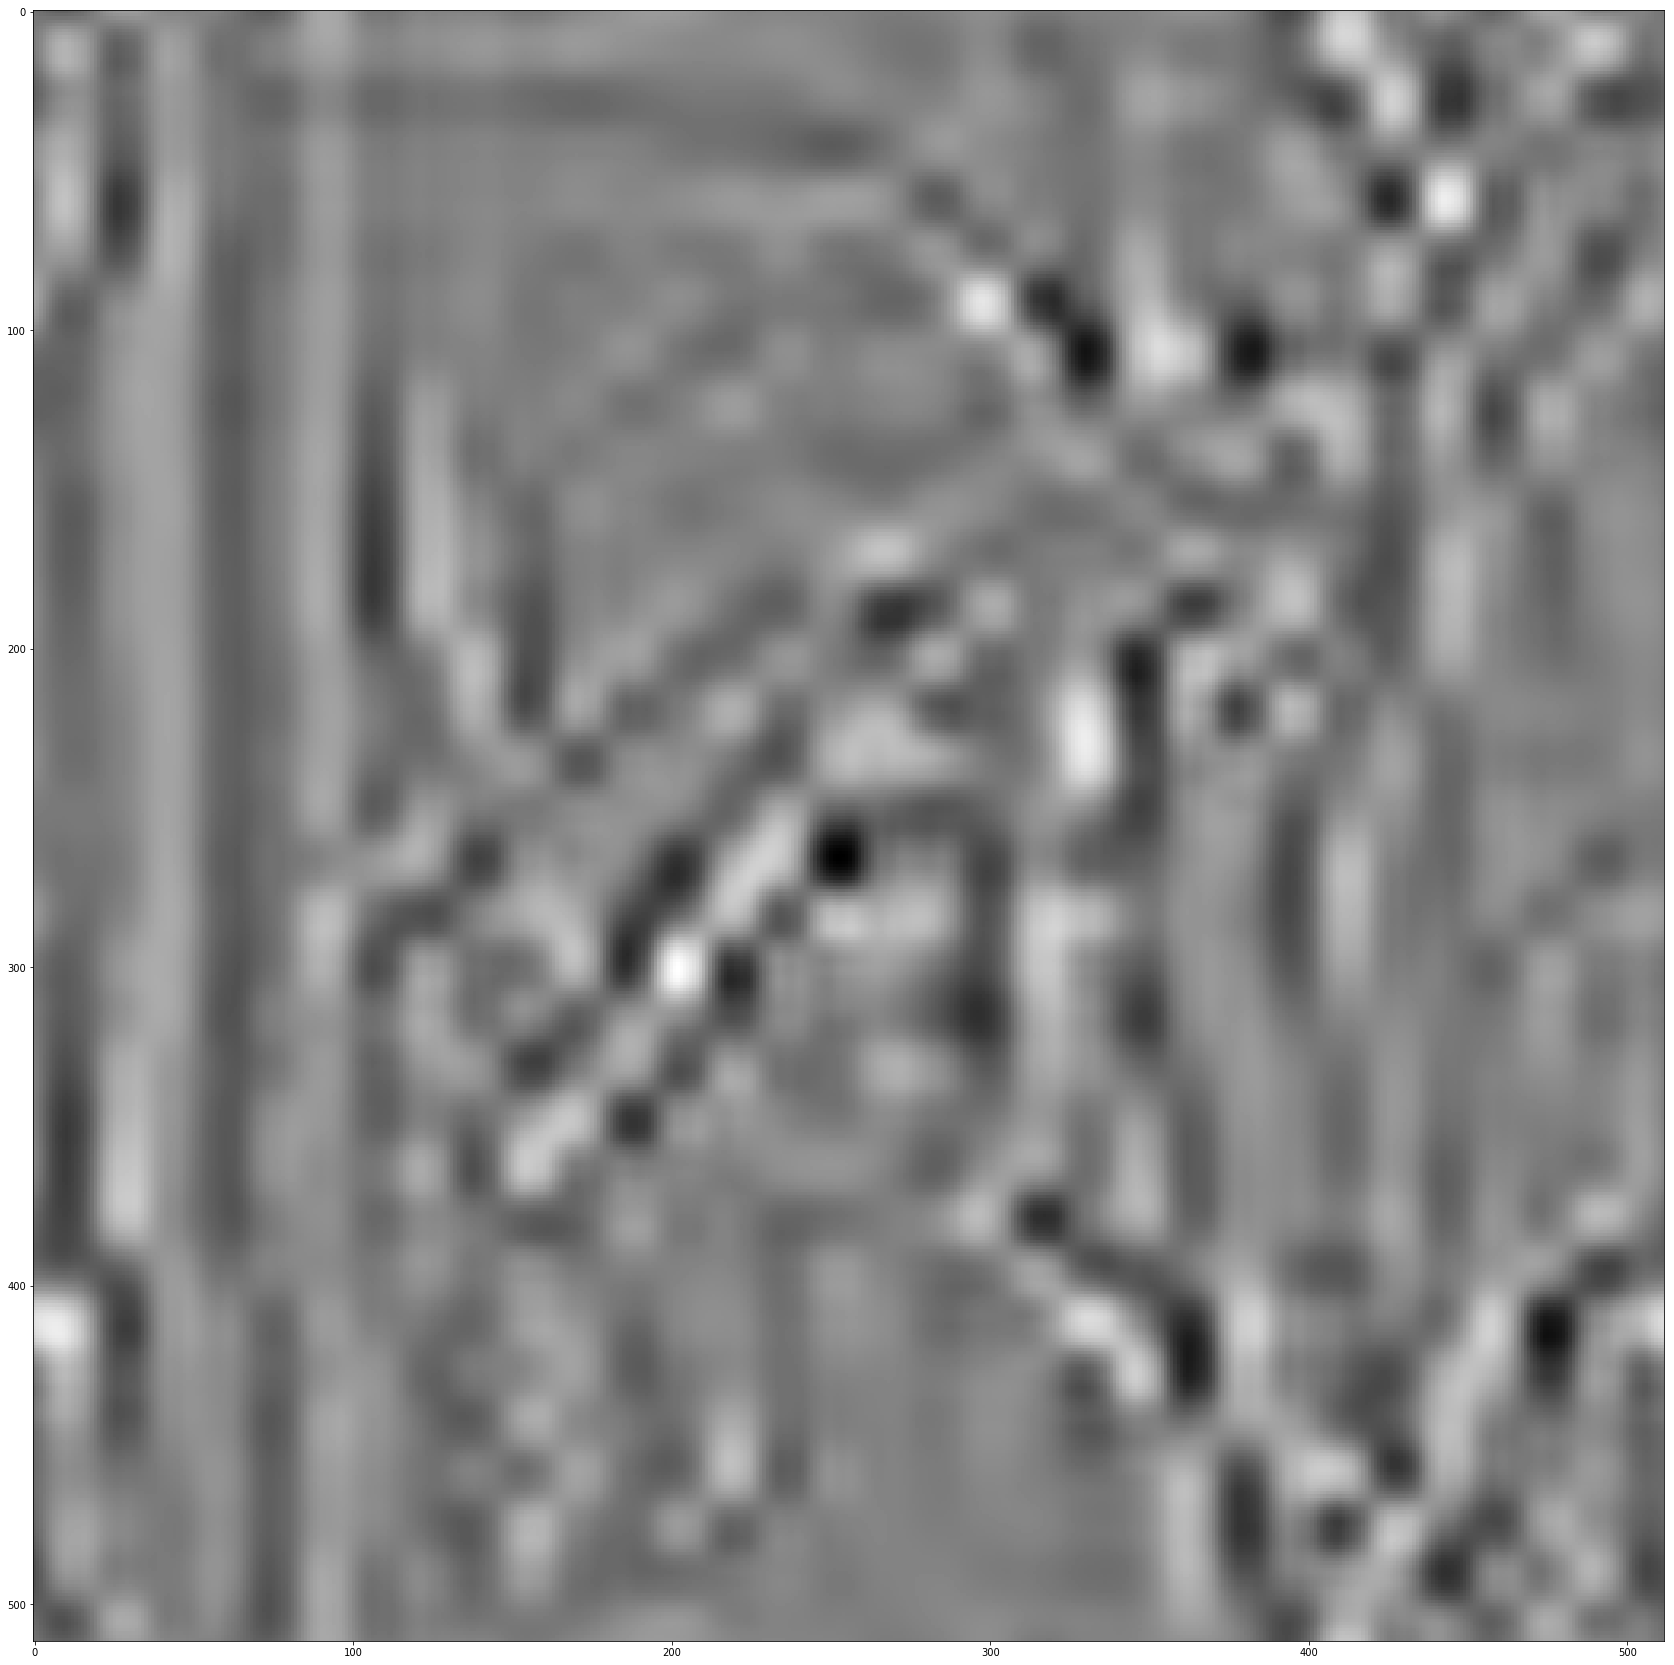

In [48]:
# Interpolated H pyramid (all levels with the same size)
i_H_ = levels*[None]
i_H_[0] = _H_[0]
show(i_H_[0])
for l in range(1,levels):
    i_H_[l] = _H_[l]
    for ll in range(l):
        print(l,ll)
        zero = np.zeros(i_H_[l].shape, np.float32)
        i_H_[l] = pywt.idwt2((i_H_[l], (zero, zero, zero)), wavelet, 'per')
        #_iH_[l] = pywt.idwt2((_iH_[l], (zero, zero, zero)), wavelet)
    show(i_H_[l])
iL = L
for ll in range(levels):
    zero = np.zeros(iL.shape, np.float32)
    iL = pywt.idwt2((iL, (zero, zero, zero)), wavelet, 'per')

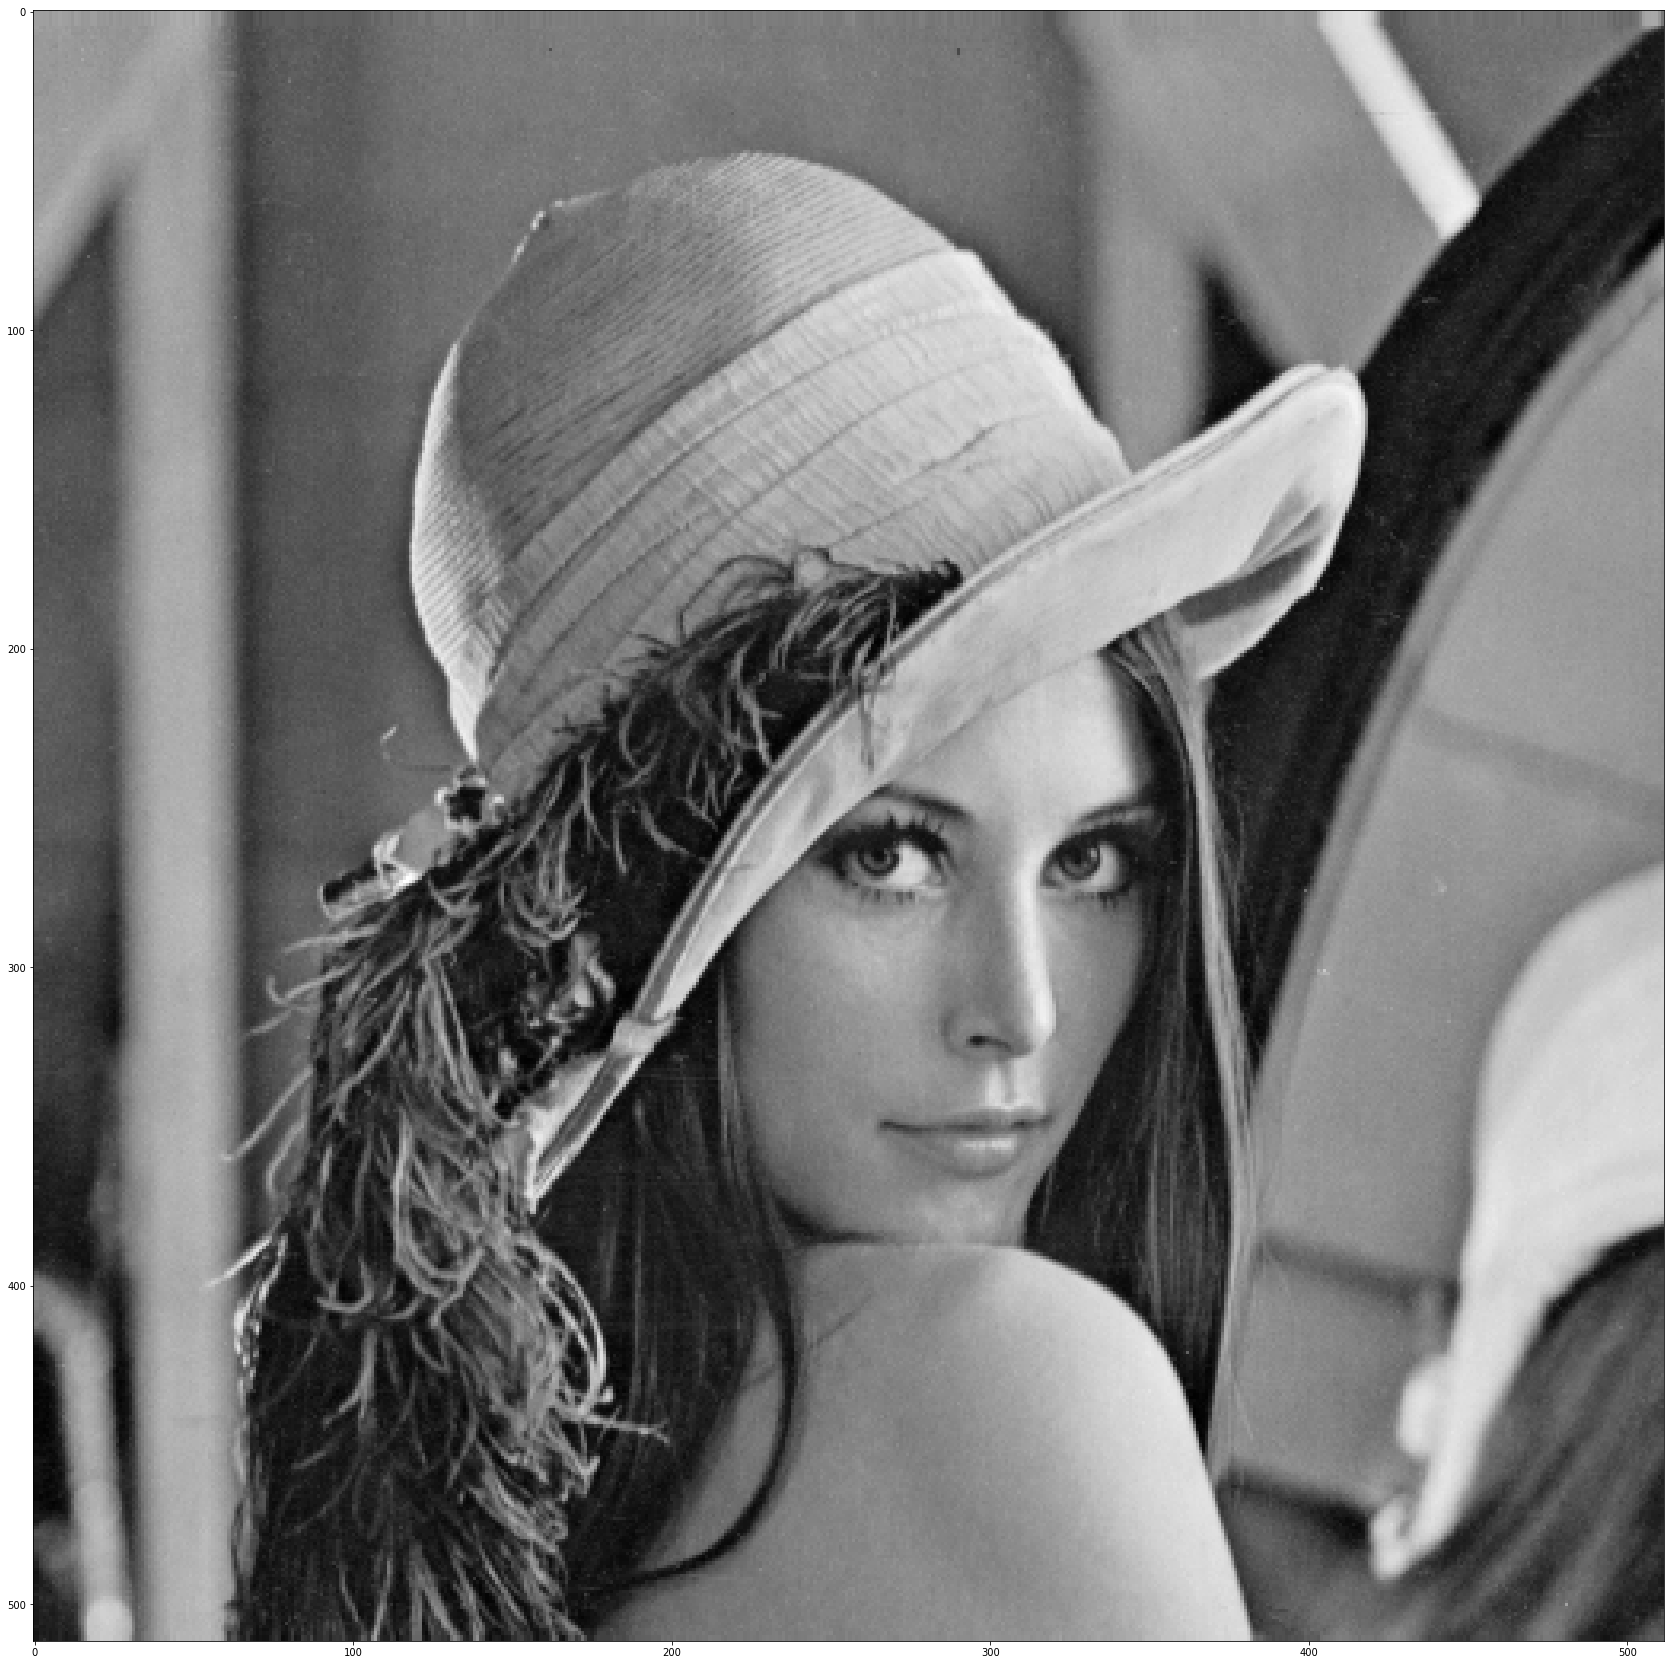

In [49]:
# Interpolated H pyramid (all levels with the same size)
sum = np.zeros(i_H_[0].shape)
for l in range(levels):
    sum += i_H_[l]
sum += iL
show(sum)

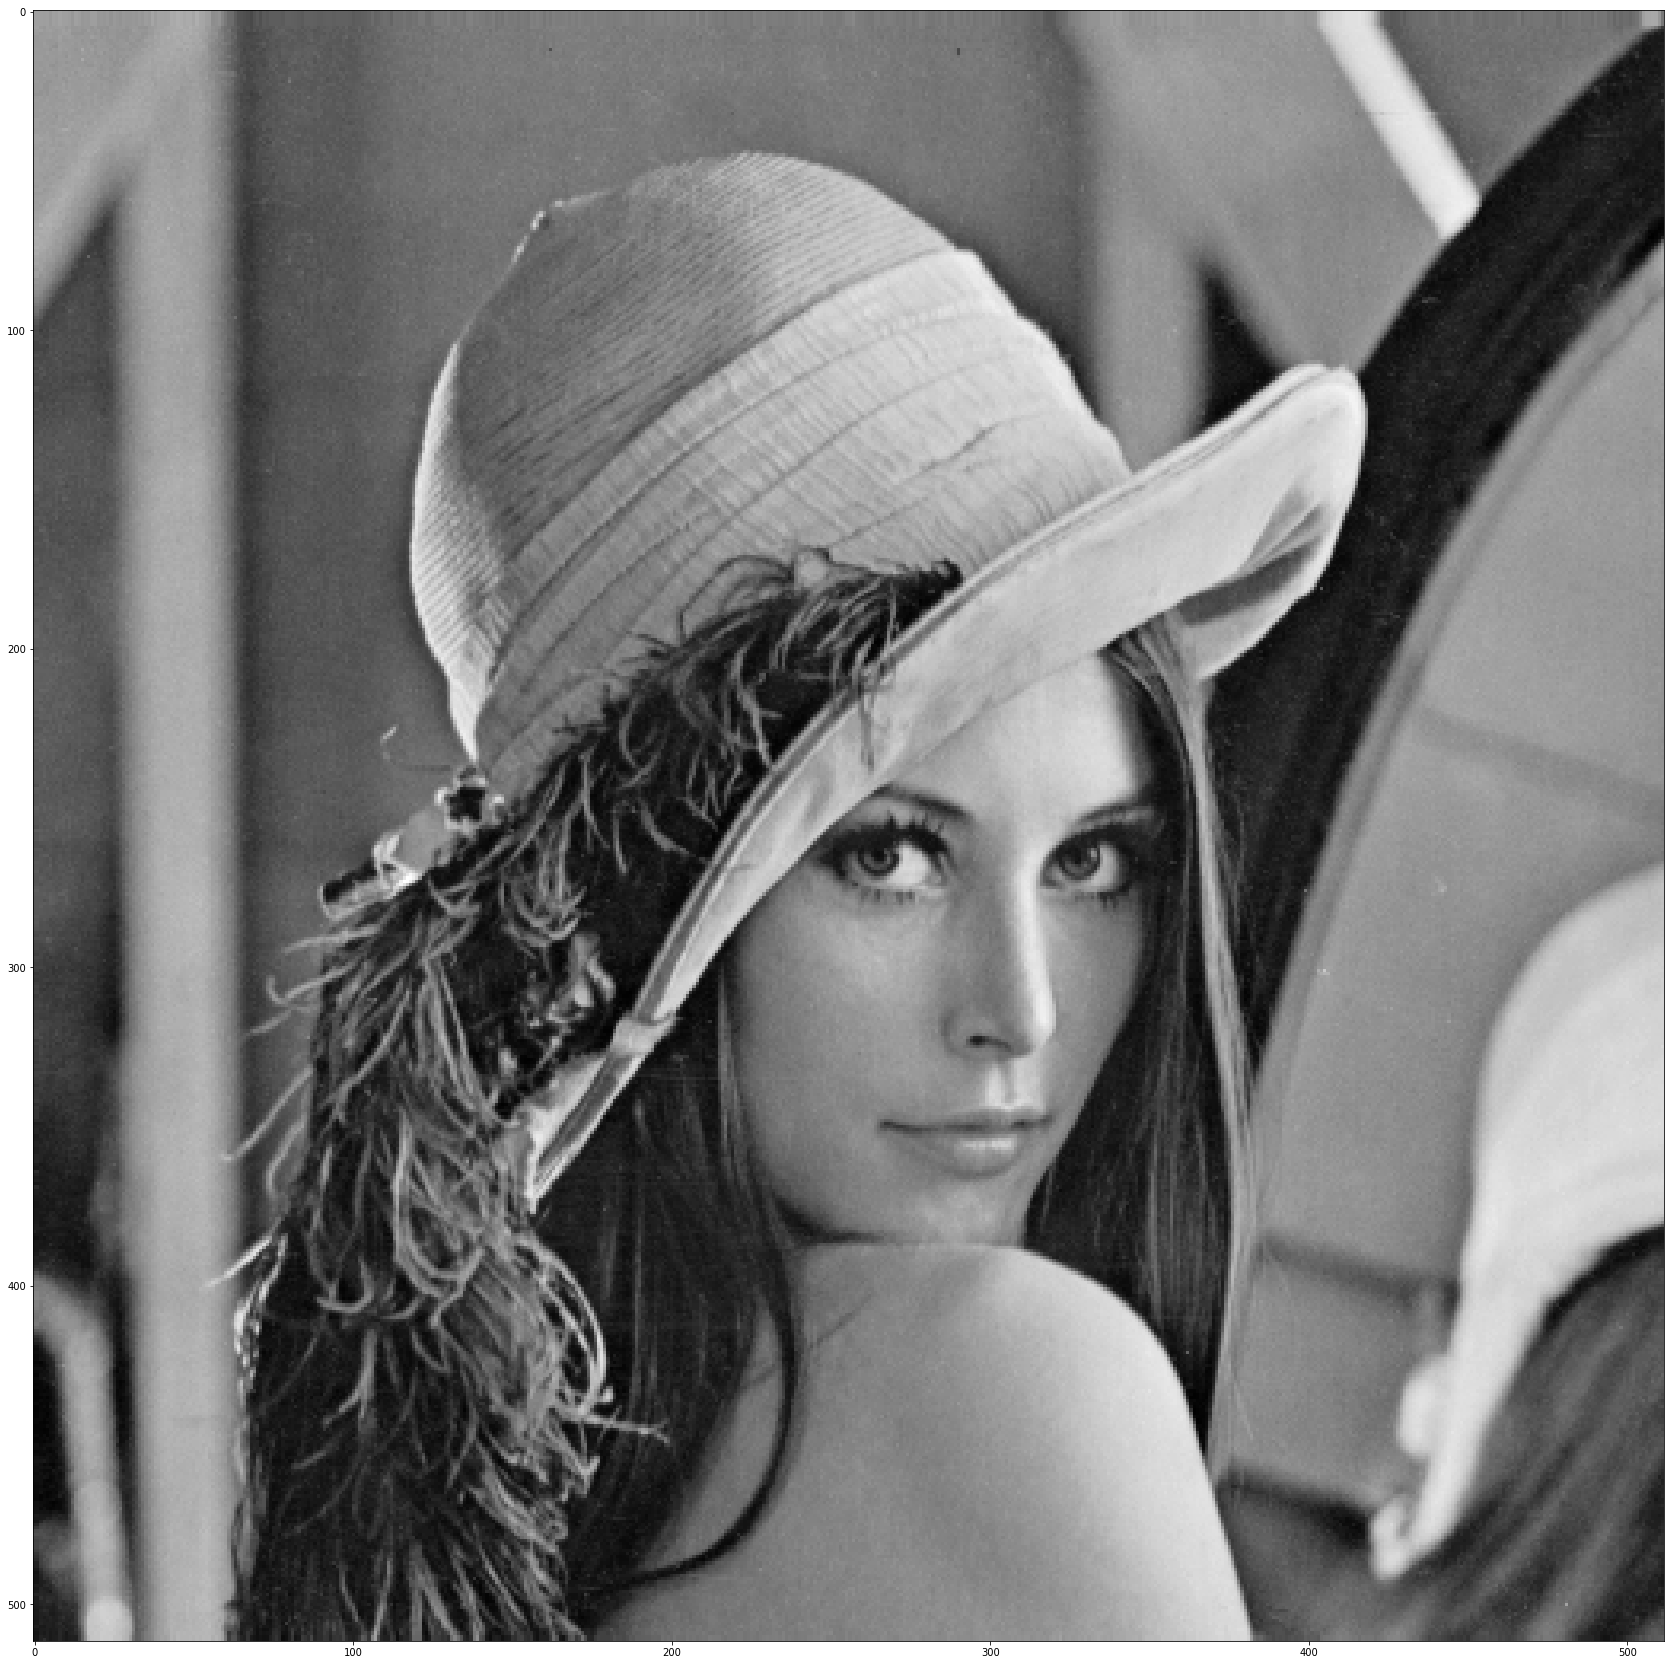

In [50]:
show(Y)

In [51]:
import cv2
def estimate_frame(reference, flow):
    height, width = flow.shape[:2]
    map_x = np.tile(np.arange(width), (height, 1))
    print("map_x=",map_x)
    map_y = np.swapaxes(np.tile(np.arange(height), (width, 1)), 0, 1)
    print("map_y=",map_y)
    print("flow=",flow)
    map_xy = (flow + np.dstack((map_x, map_y))).astype('float32')
    print("map_xy=",map_xy)
    return cv2.remap(reference, map_xy, None, 
            interpolation=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REPLICATE)

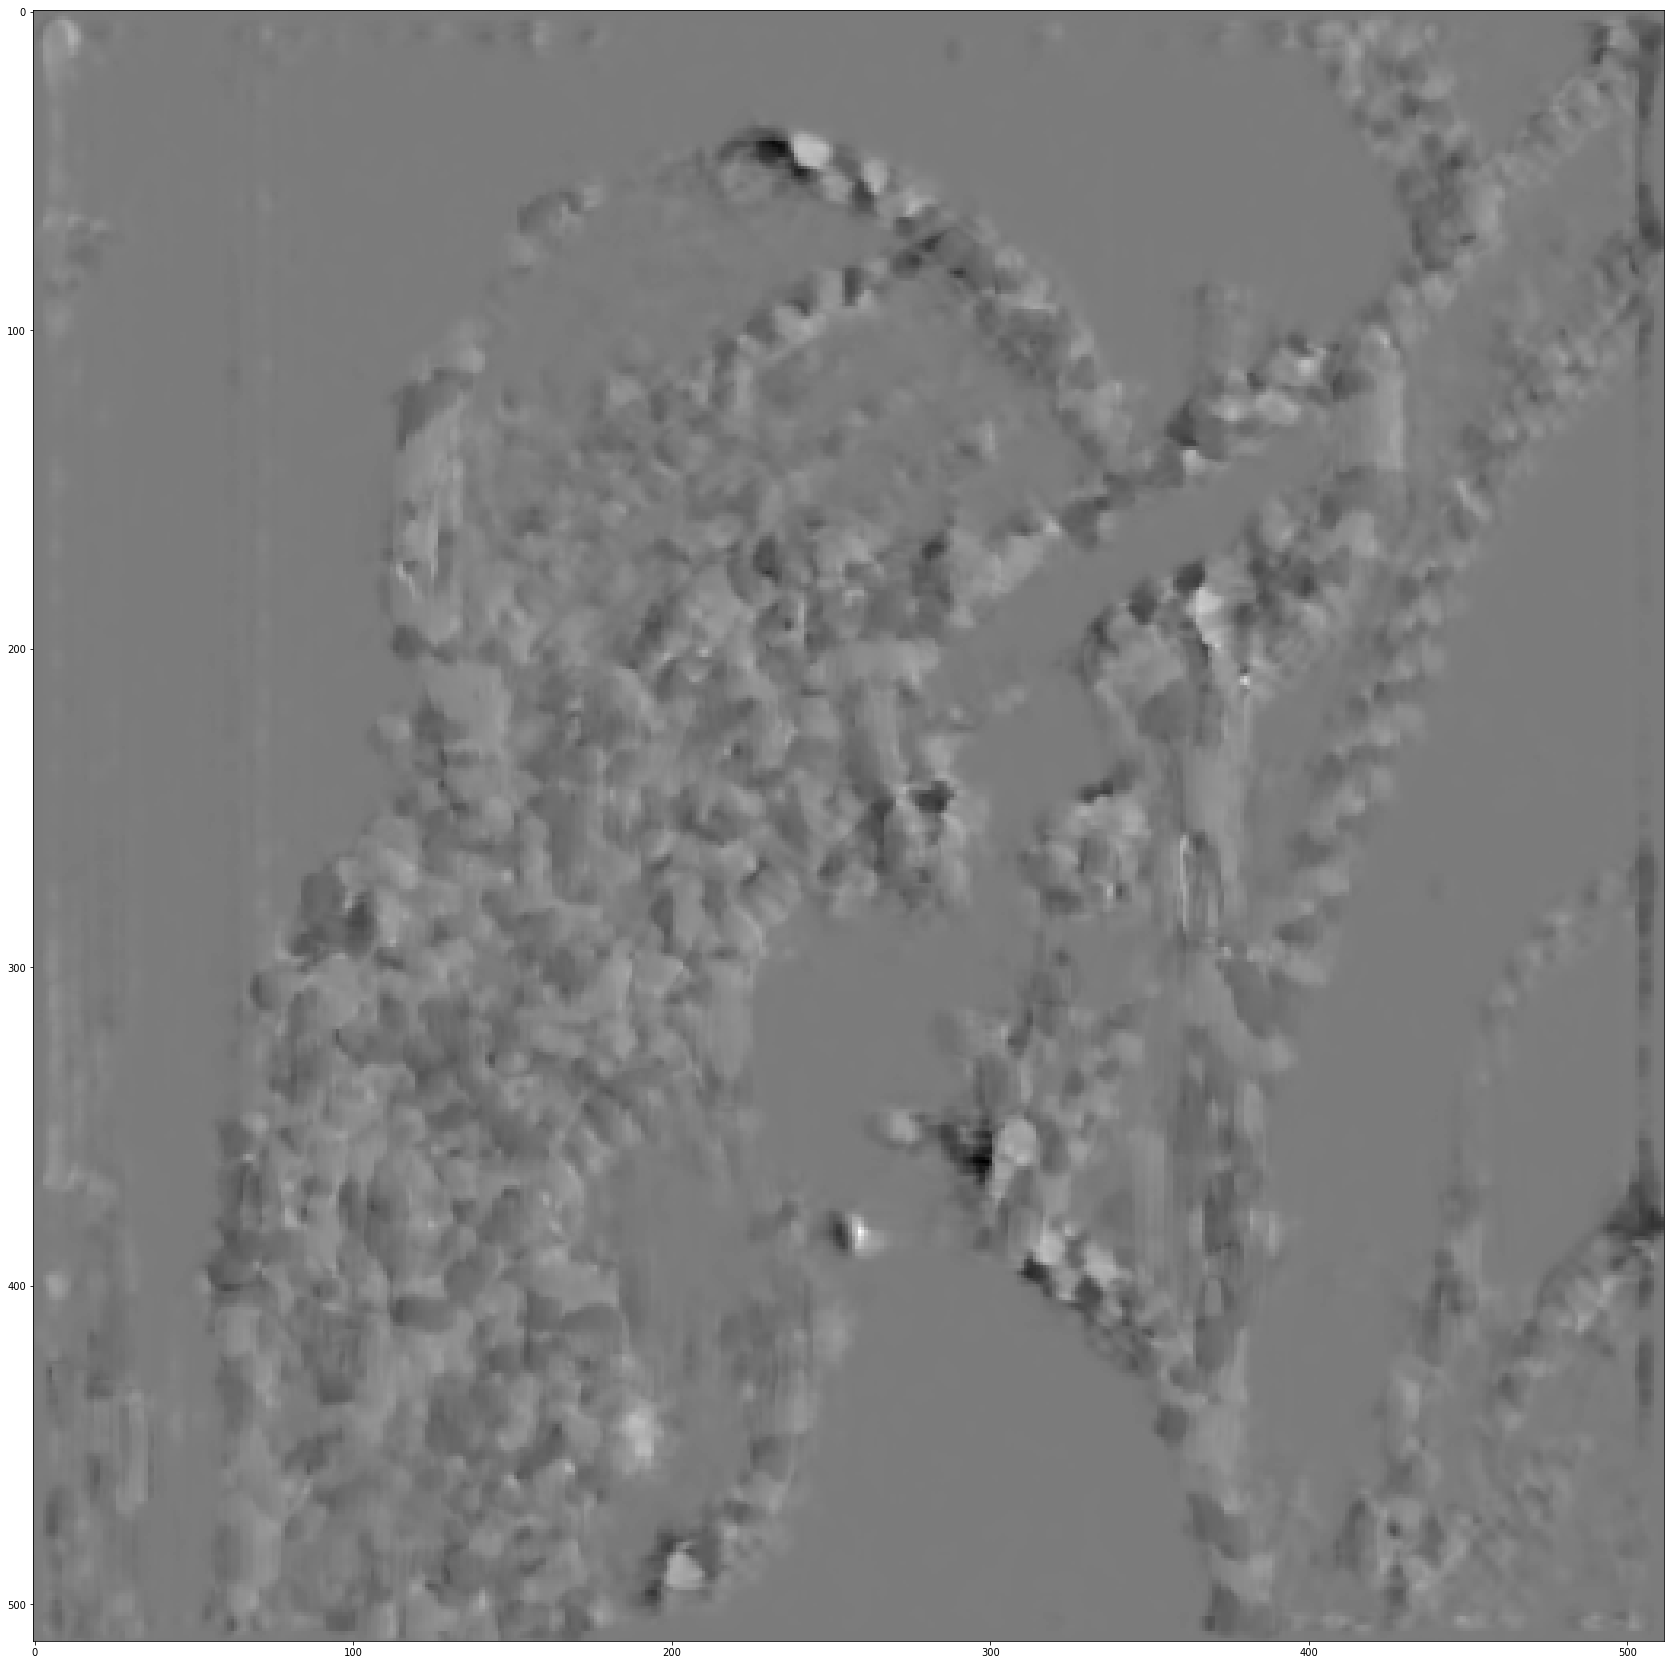

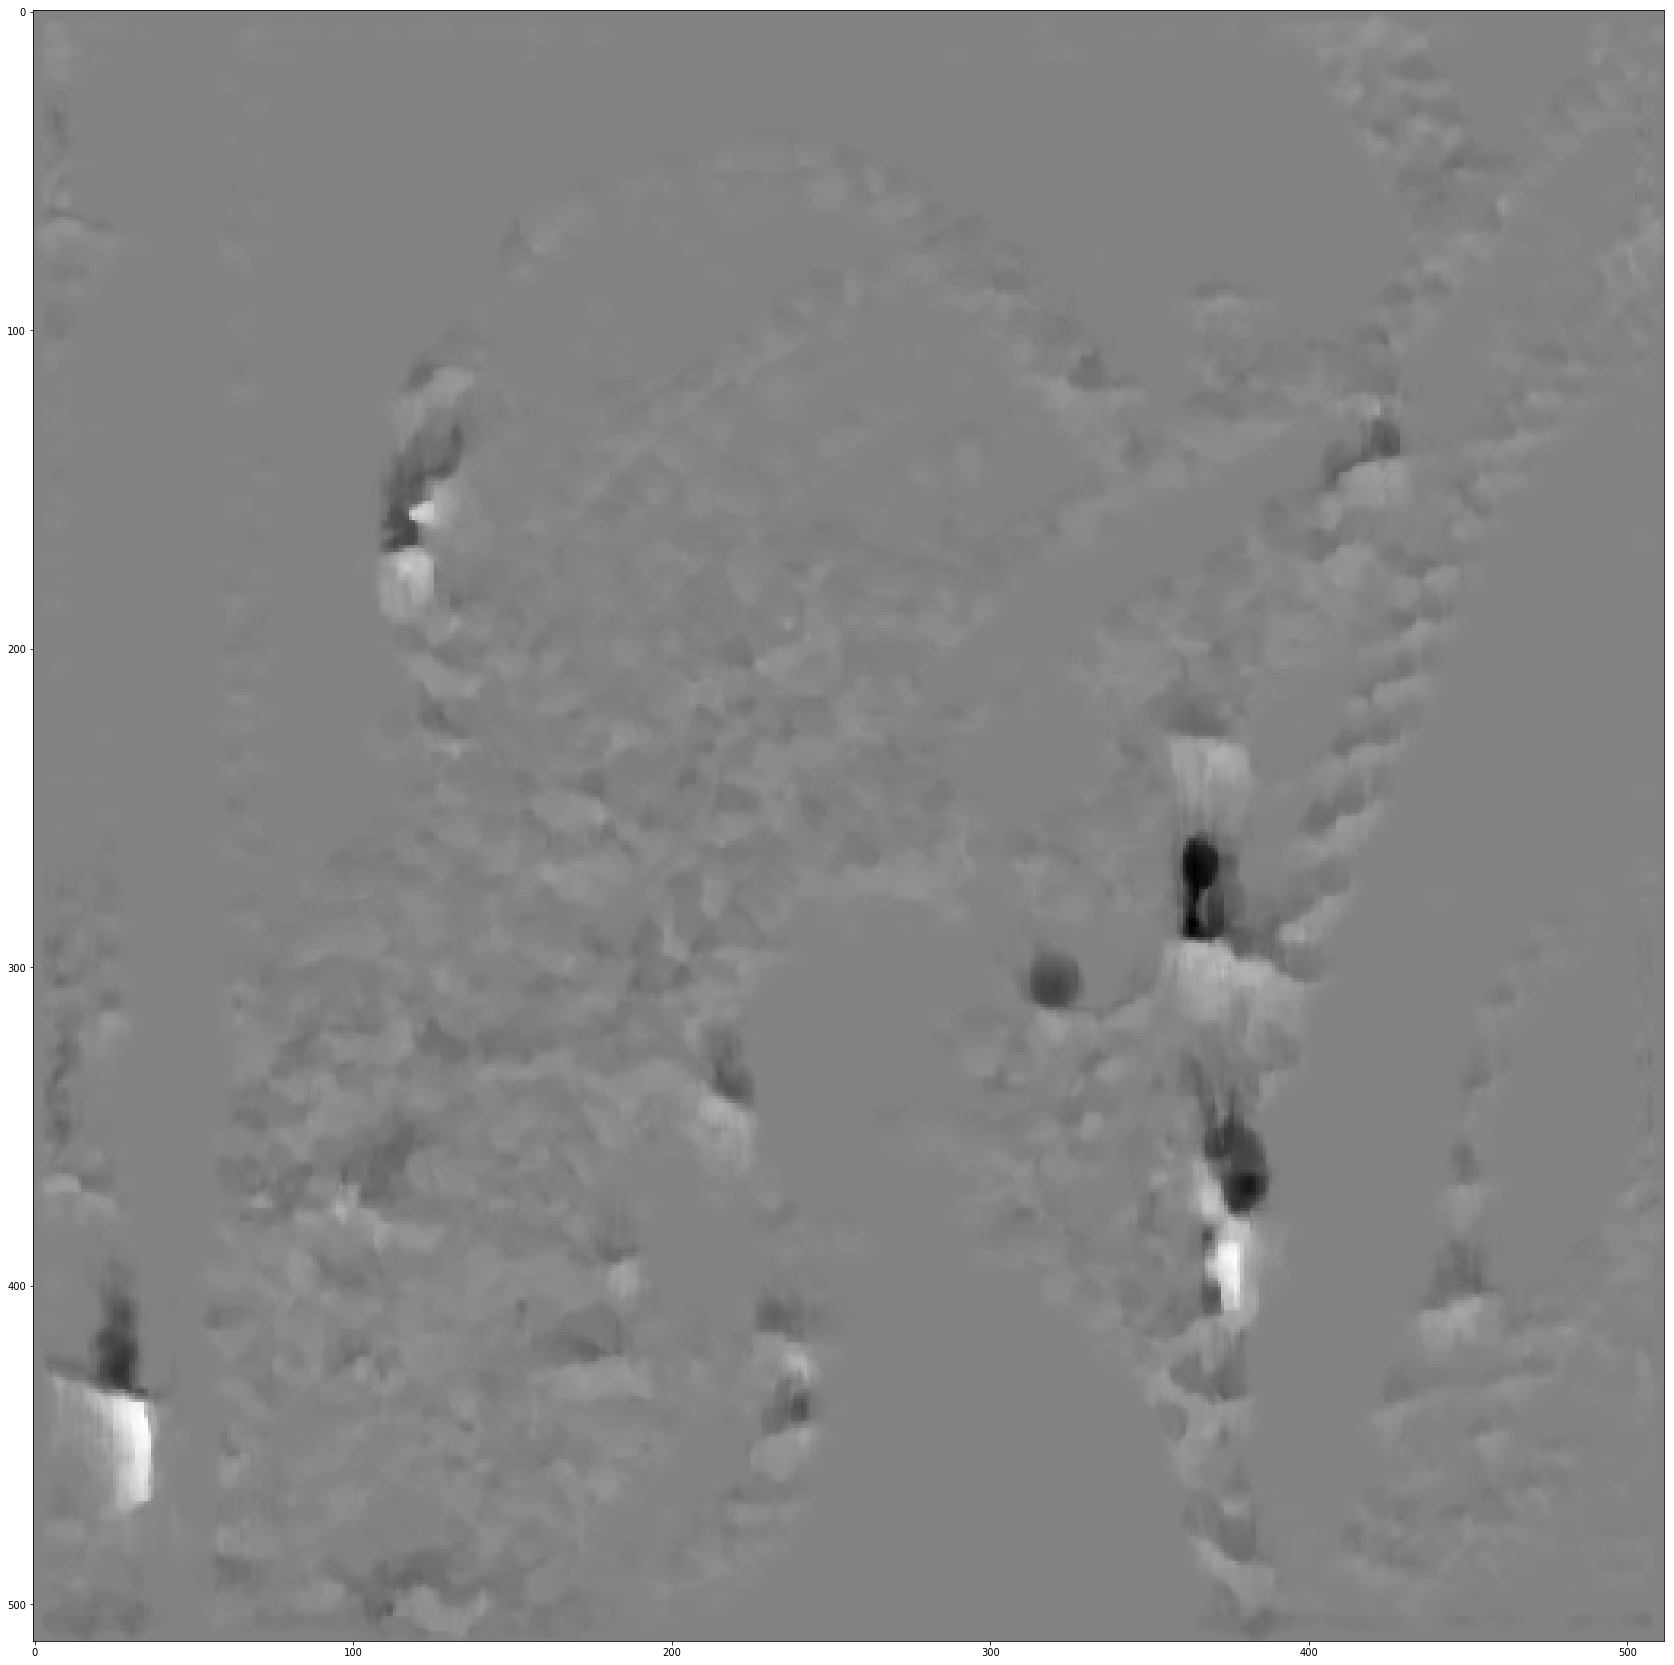

In [52]:
#flow = cv2.calcOpticalFlowFarneback(prev=Y1,
#                                   next=Y0,
#                                   flow=None,
#                                   pyr_scale=0.5,
#                                   levels=1,
#                                   winsize=15,
#                                   iterations=1,
#                                   poly_n=5,
#                                   poly_sigma=1.1,
#                                   flags=0)
flow = cv2.calcOpticalFlowFarneback(prev=i_H_[1],
                                   next=i_H_[2],
                                   flow=None,
                                   pyr_scale=0.5,
                                   levels=5,
                                   winsize=5,
                                   iterations=1,
                                   poly_n=7,
                                   poly_sigma=1.5,
                                   flags=0)
show(flow[:,:,0])
show(flow[:,:,1])

map_x= [[  0   1   2 ... 509 510 511]
 [  0   1   2 ... 509 510 511]
 [  0   1   2 ... 509 510 511]
 ...
 [  0   1   2 ... 509 510 511]
 [  0   1   2 ... 509 510 511]
 [  0   1   2 ... 509 510 511]]
map_y= [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [509 509 509 ... 509 509 509]
 [510 510 510 ... 510 510 510]
 [511 511 511 ... 511 511 511]]
flow= [[[ 2.36230280e-05  2.83704634e-04]
  [-2.88605603e-04  1.12104858e-03]
  [-2.81901774e-03  2.67183688e-03]
  ...
  [ 1.63869211e-03 -5.81121817e-02]
  [ 7.16808904e-03 -1.70103367e-02]
  [-1.05448894e-03 -1.62629236e-03]]

 [[-1.30891440e-05  2.77654879e-04]
  [-3.11425468e-03  3.27372737e-03]
  [-1.64790358e-02  1.16580799e-02]
  ...
  [-7.07728490e-02 -2.77217001e-01]
  [ 1.97460782e-02 -9.35803354e-02]
  [-6.19190605e-03 -7.62436679e-03]]

 [[-9.71558271e-04  1.06590602e-03]
  [-1.10996049e-02  1.03853000e-02]
  [-4.51898351e-02  3.06068771e-02]
  ...
  [-2.68593878e-01 -5.57887912e-01

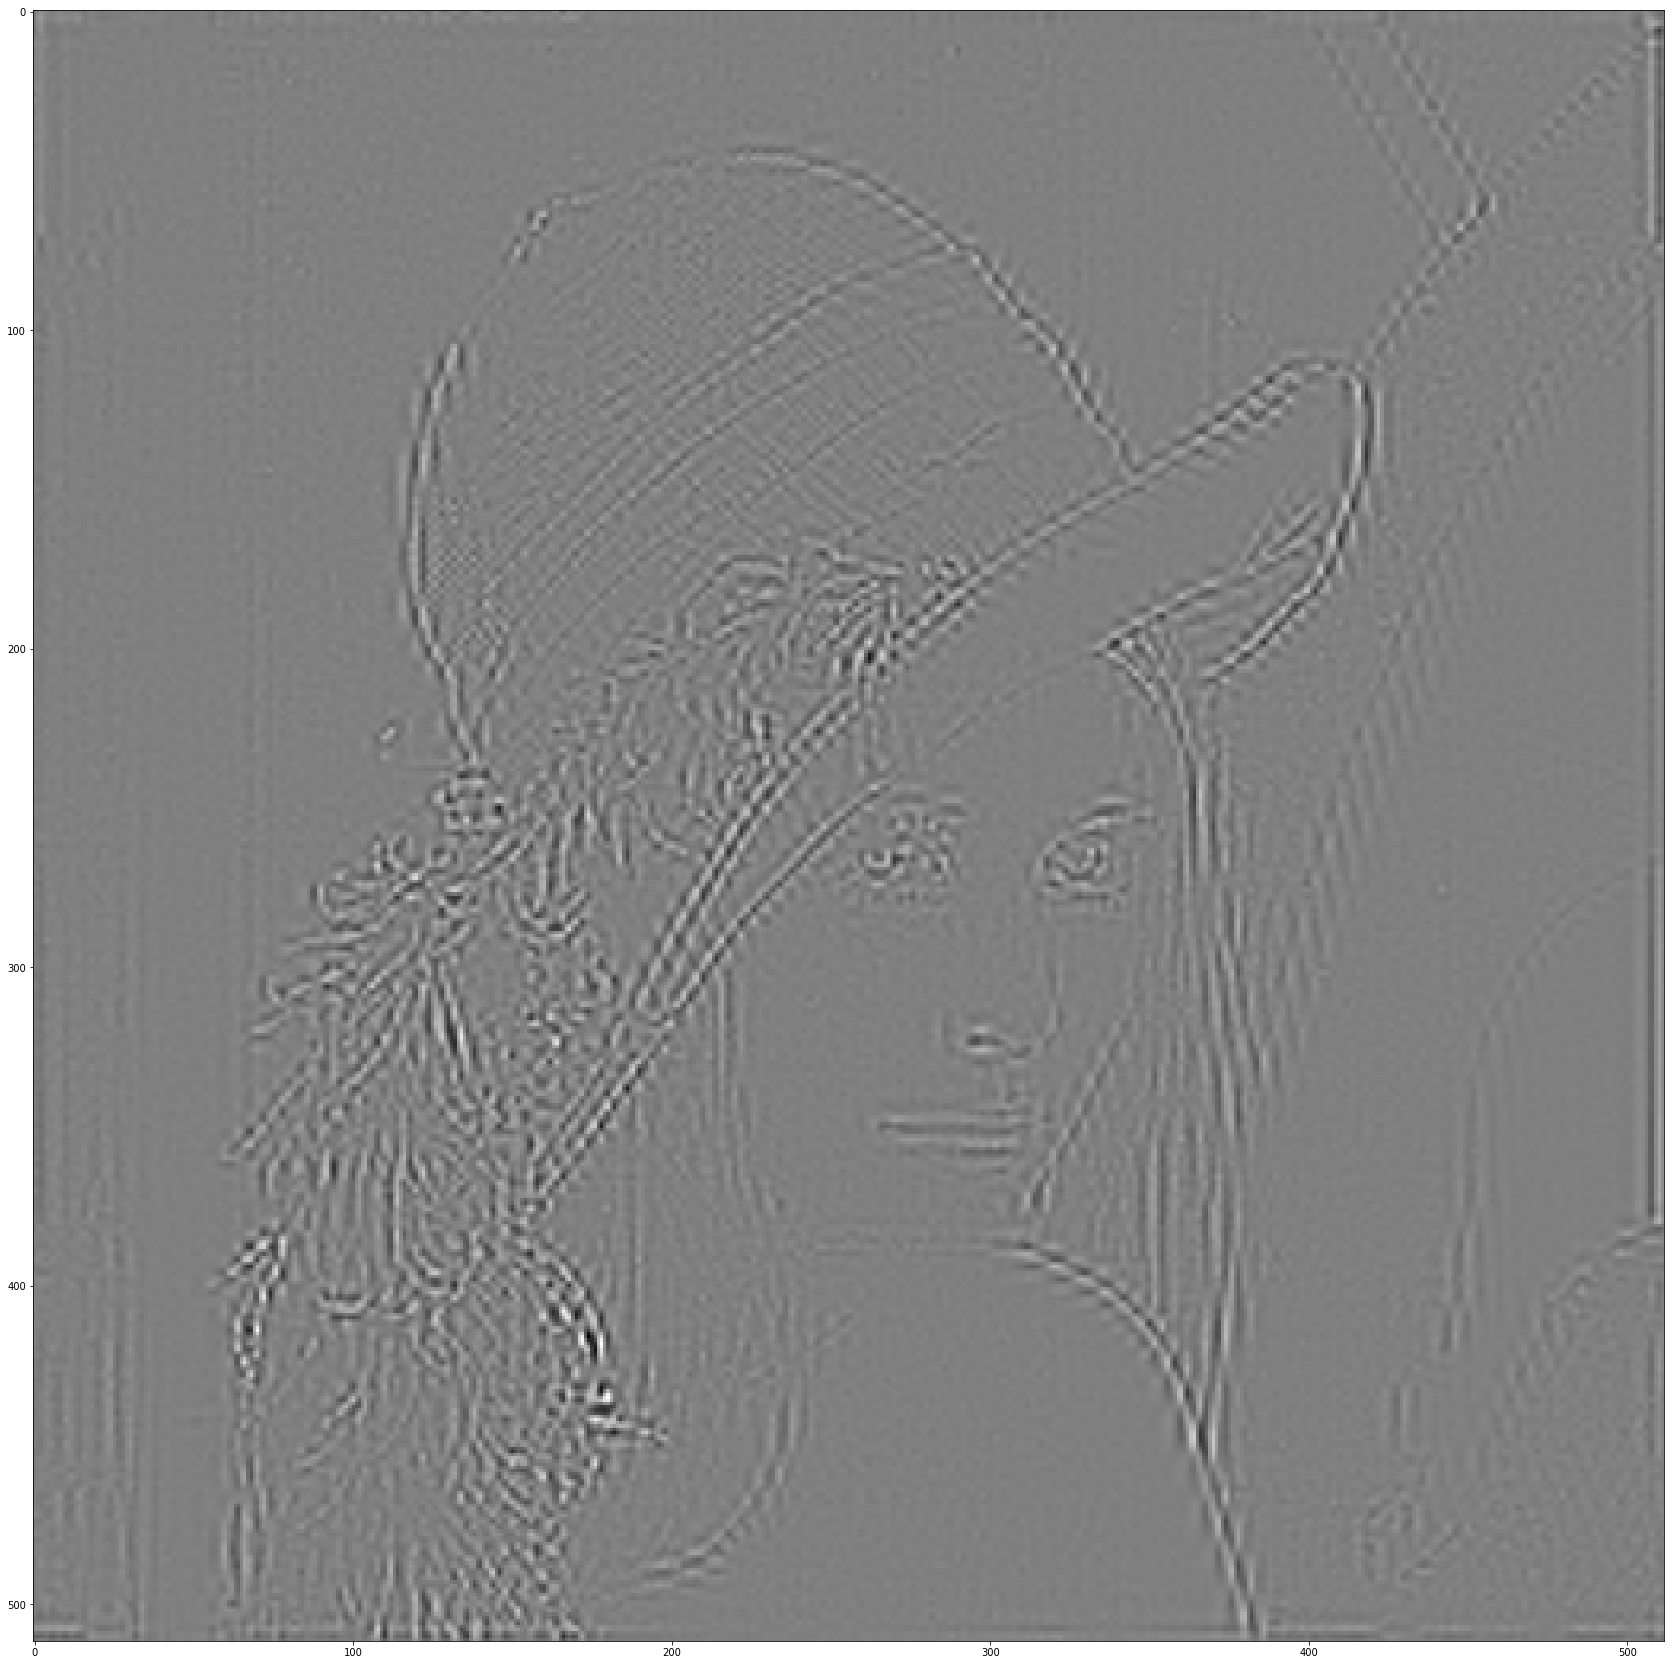

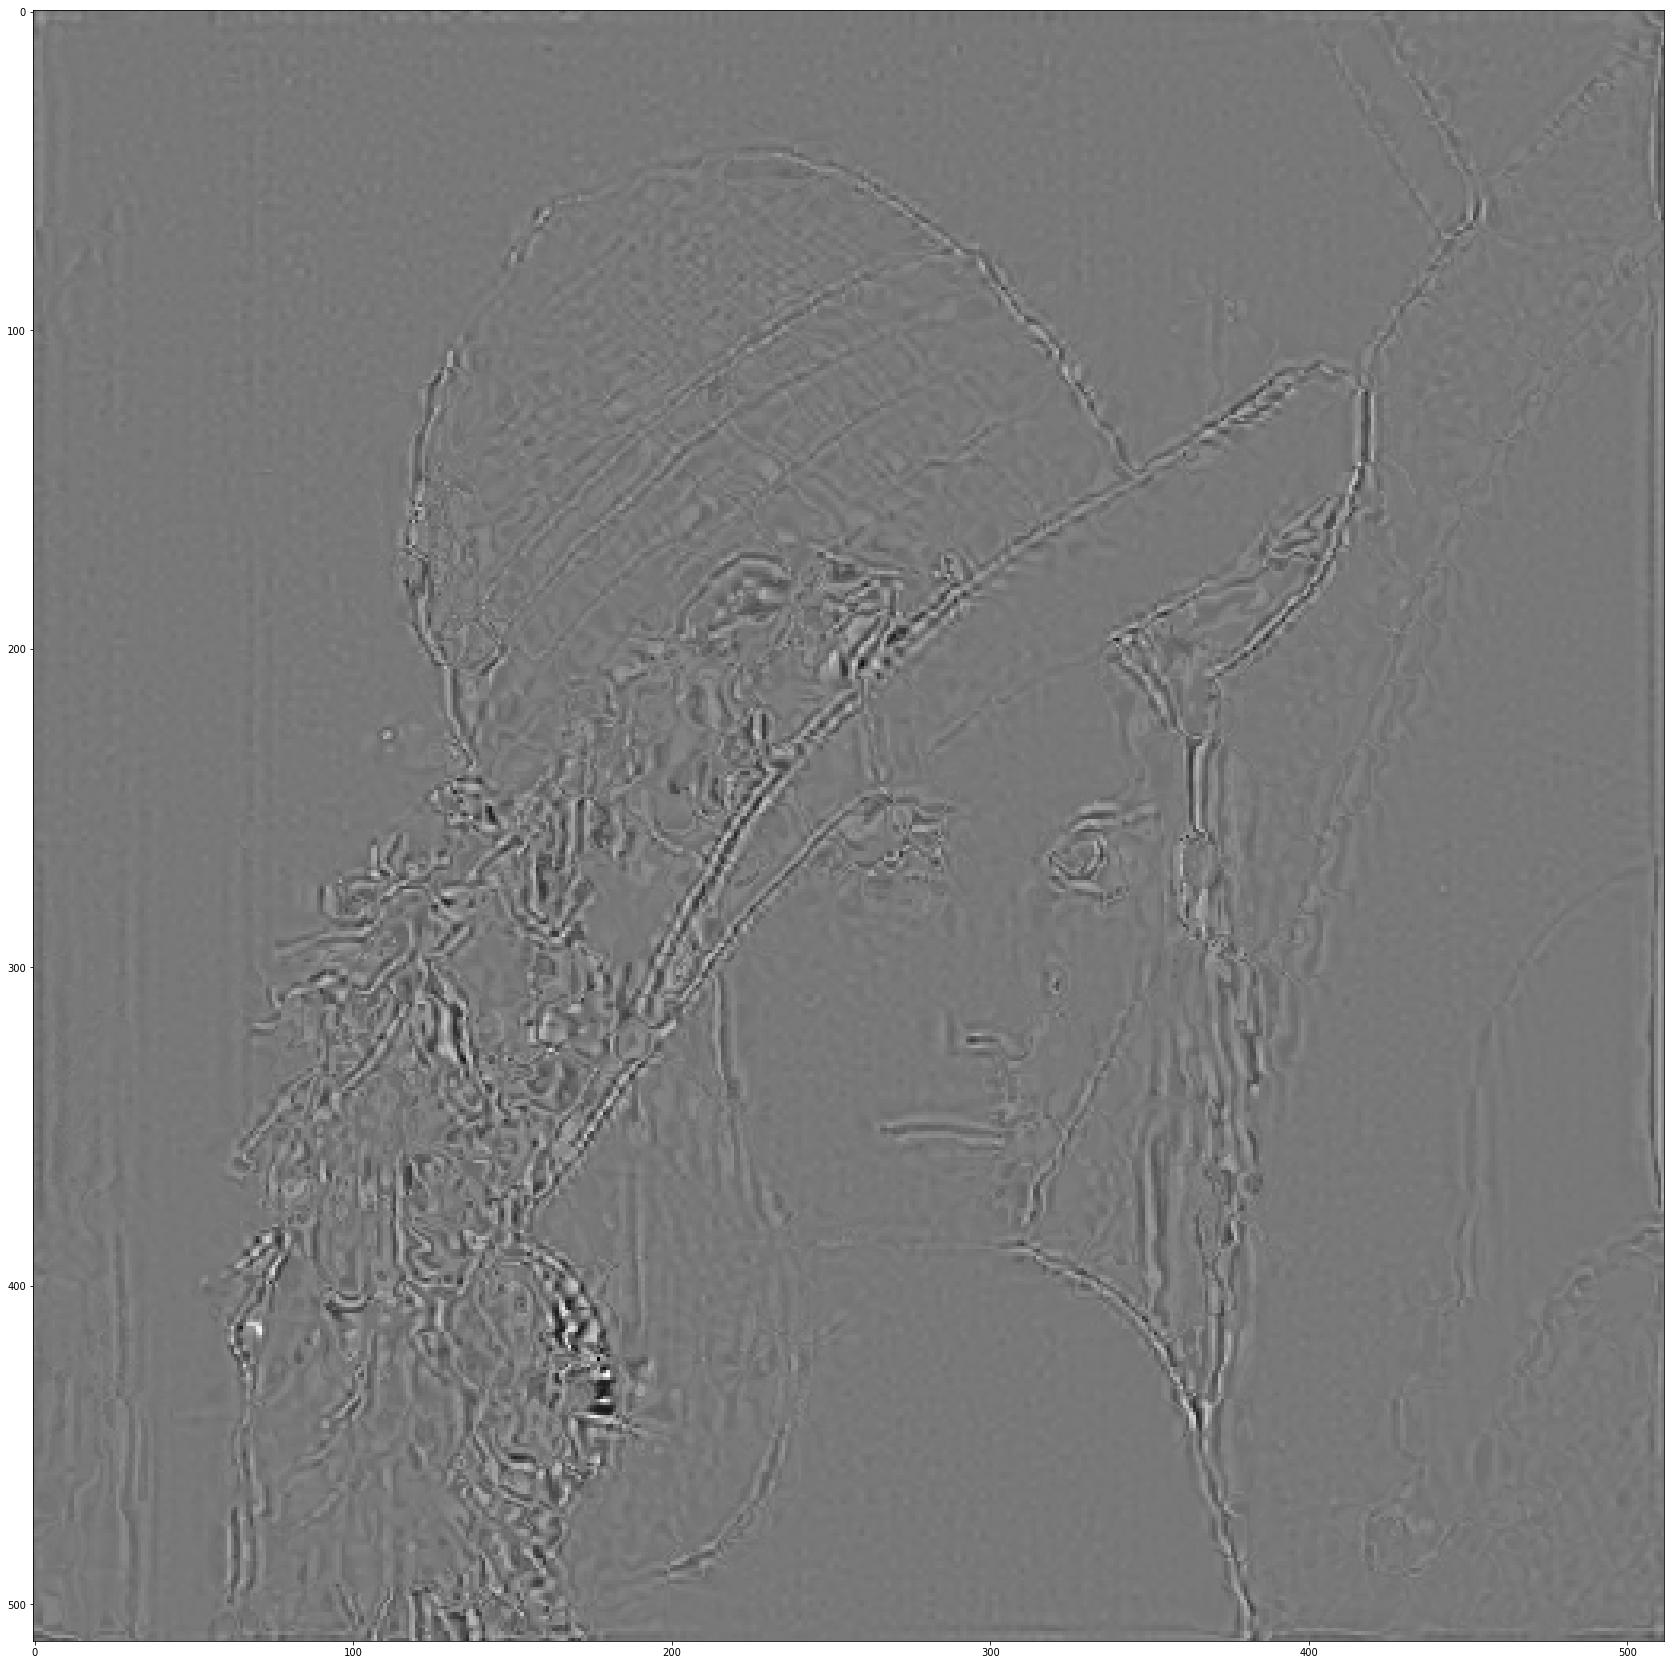

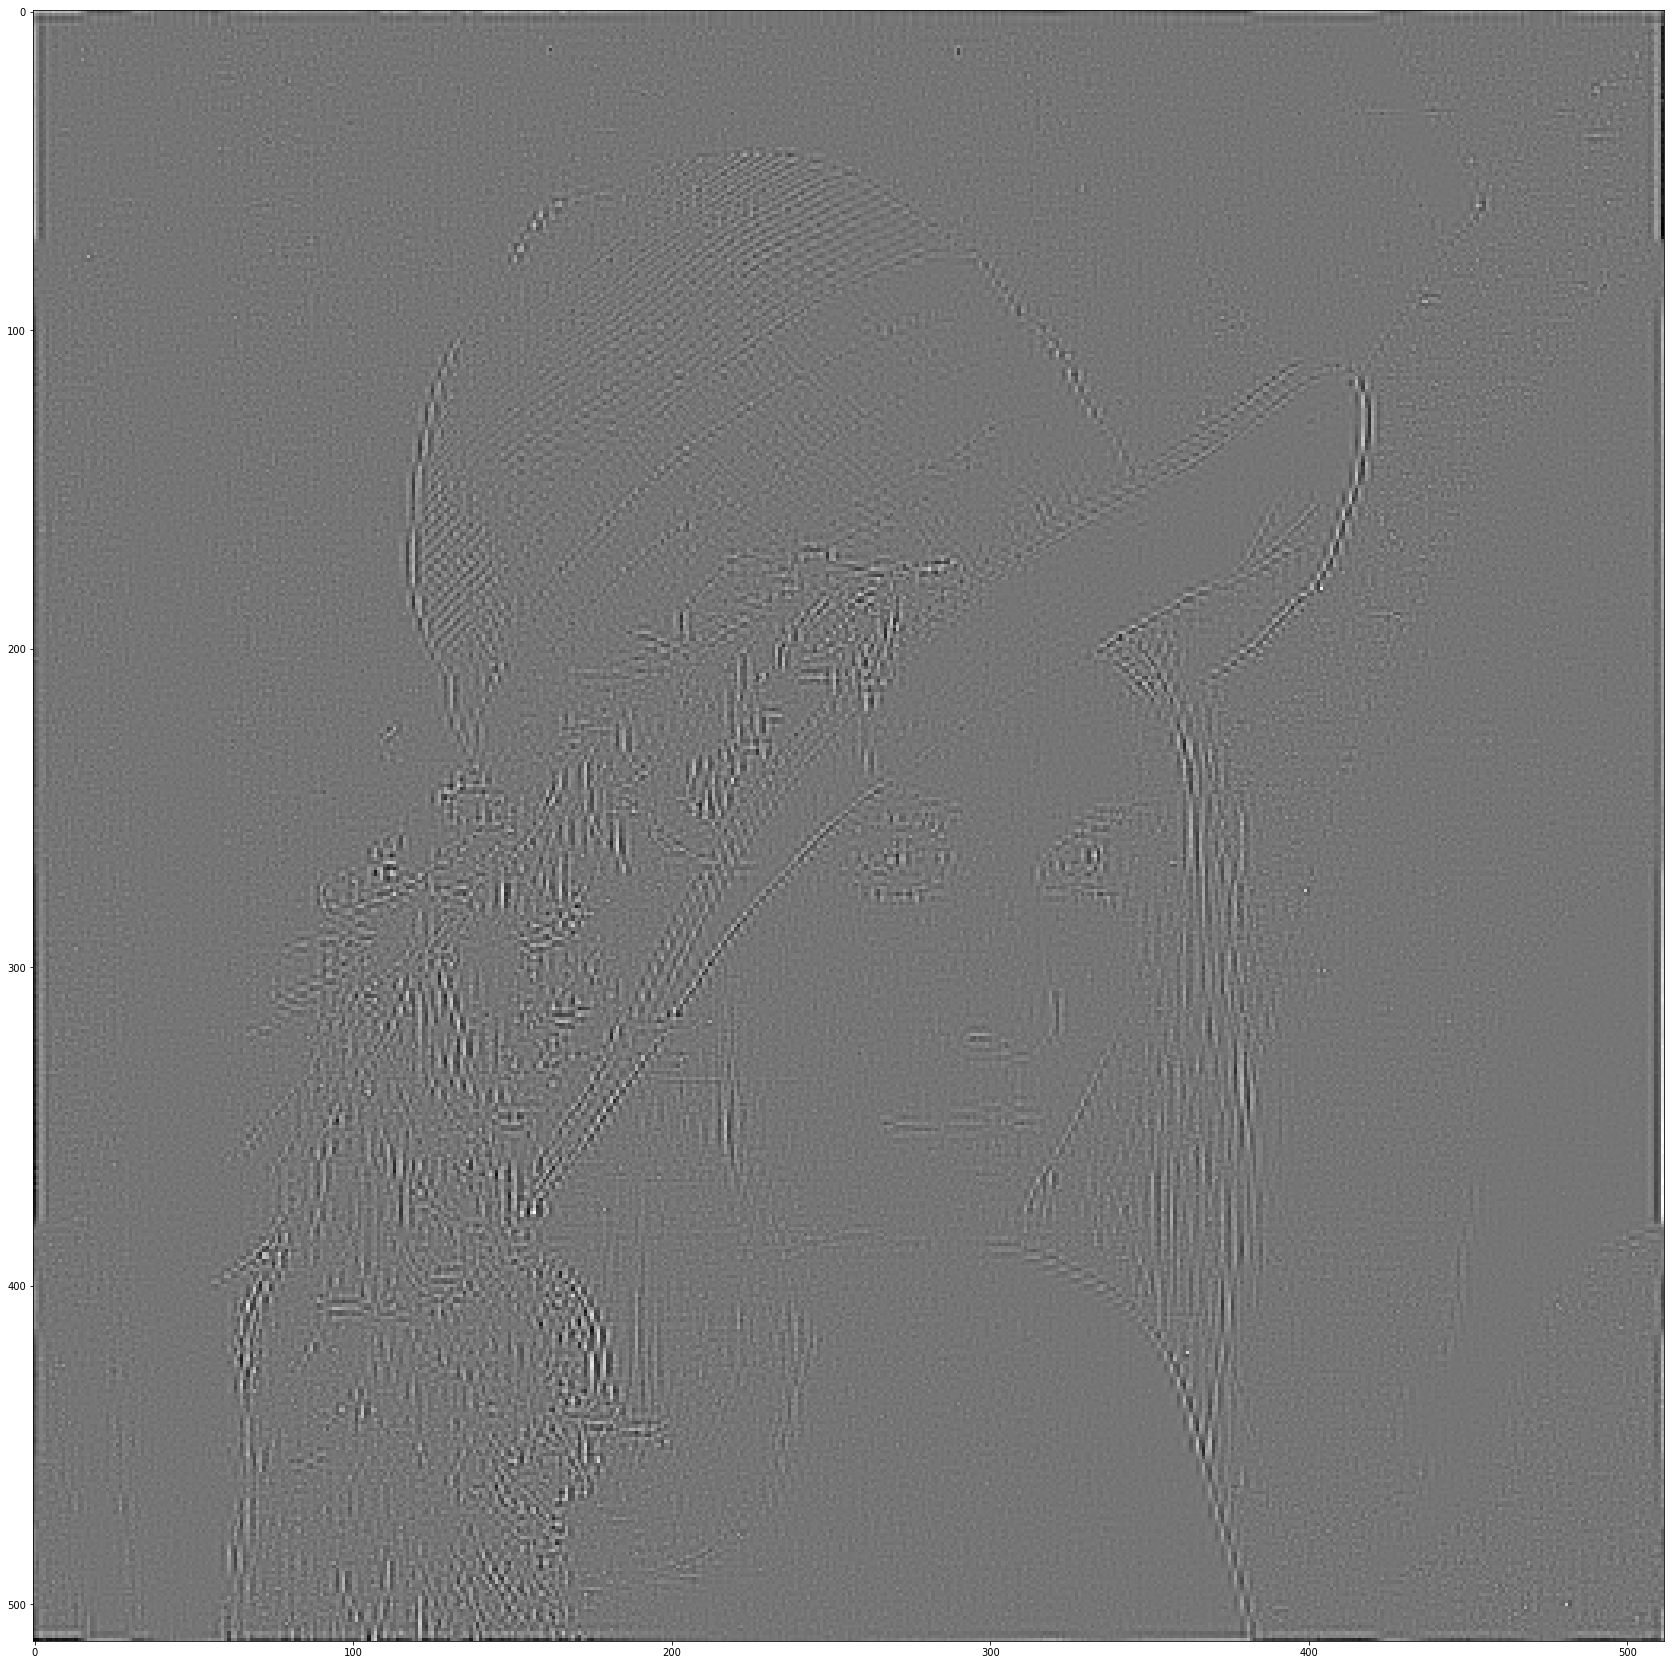

In [53]:
estimation = estimate_frame(i_H_[1], flow)
show(i_H_[1])
show(estimation)
show(i_H_[0])

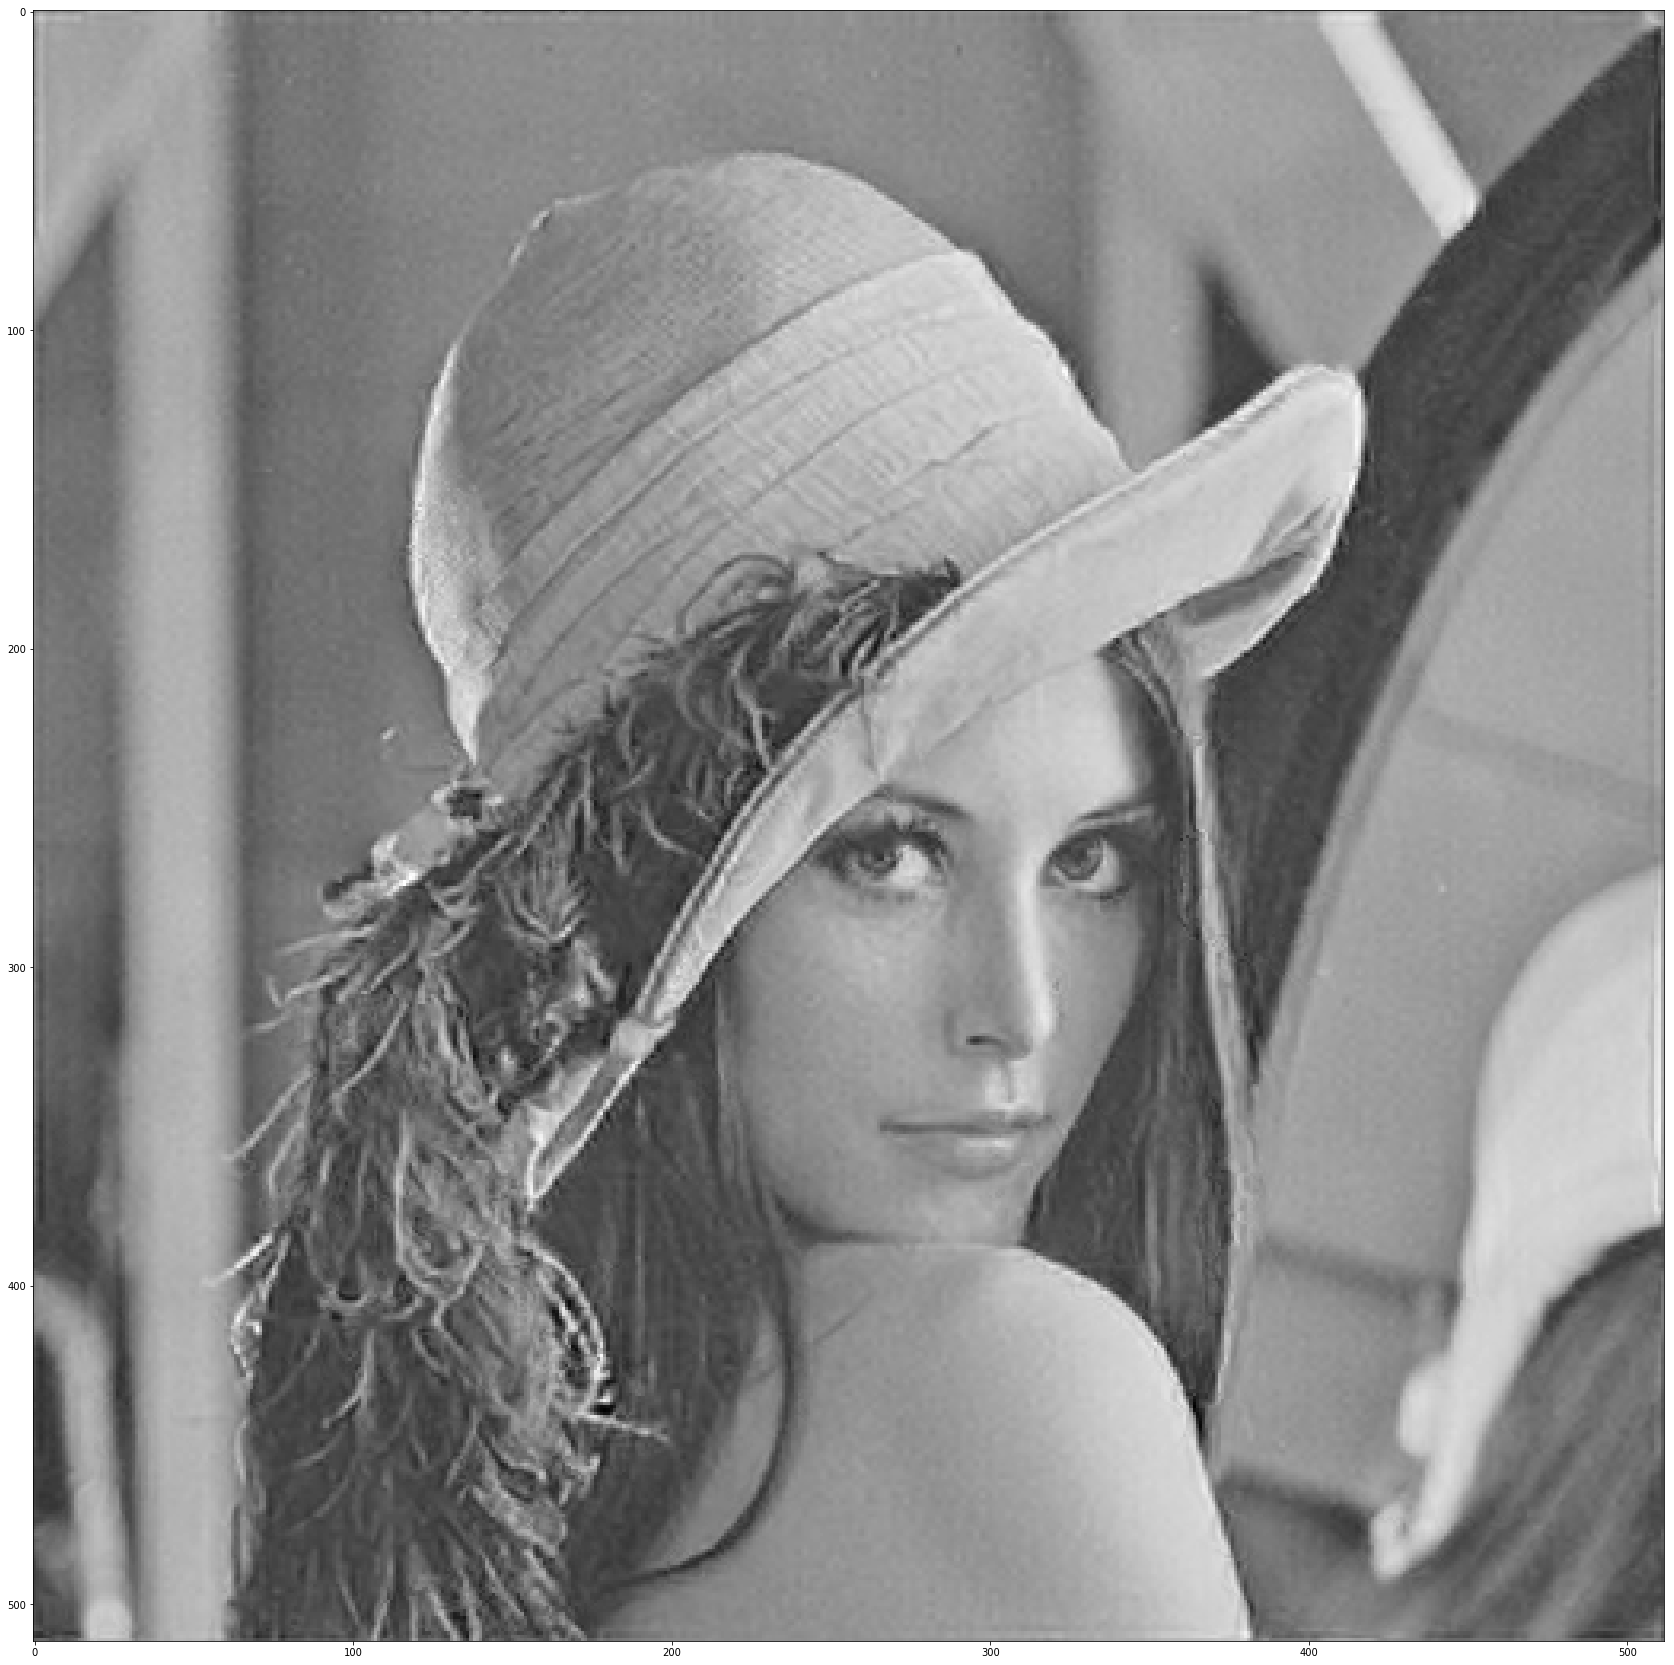

In [59]:
i_H_[0] = estimation
sum = np.zeros(i_H_[0].shape)
for l in range(levels):
    sum += i_H_[l]
sum += iL
show(sum)

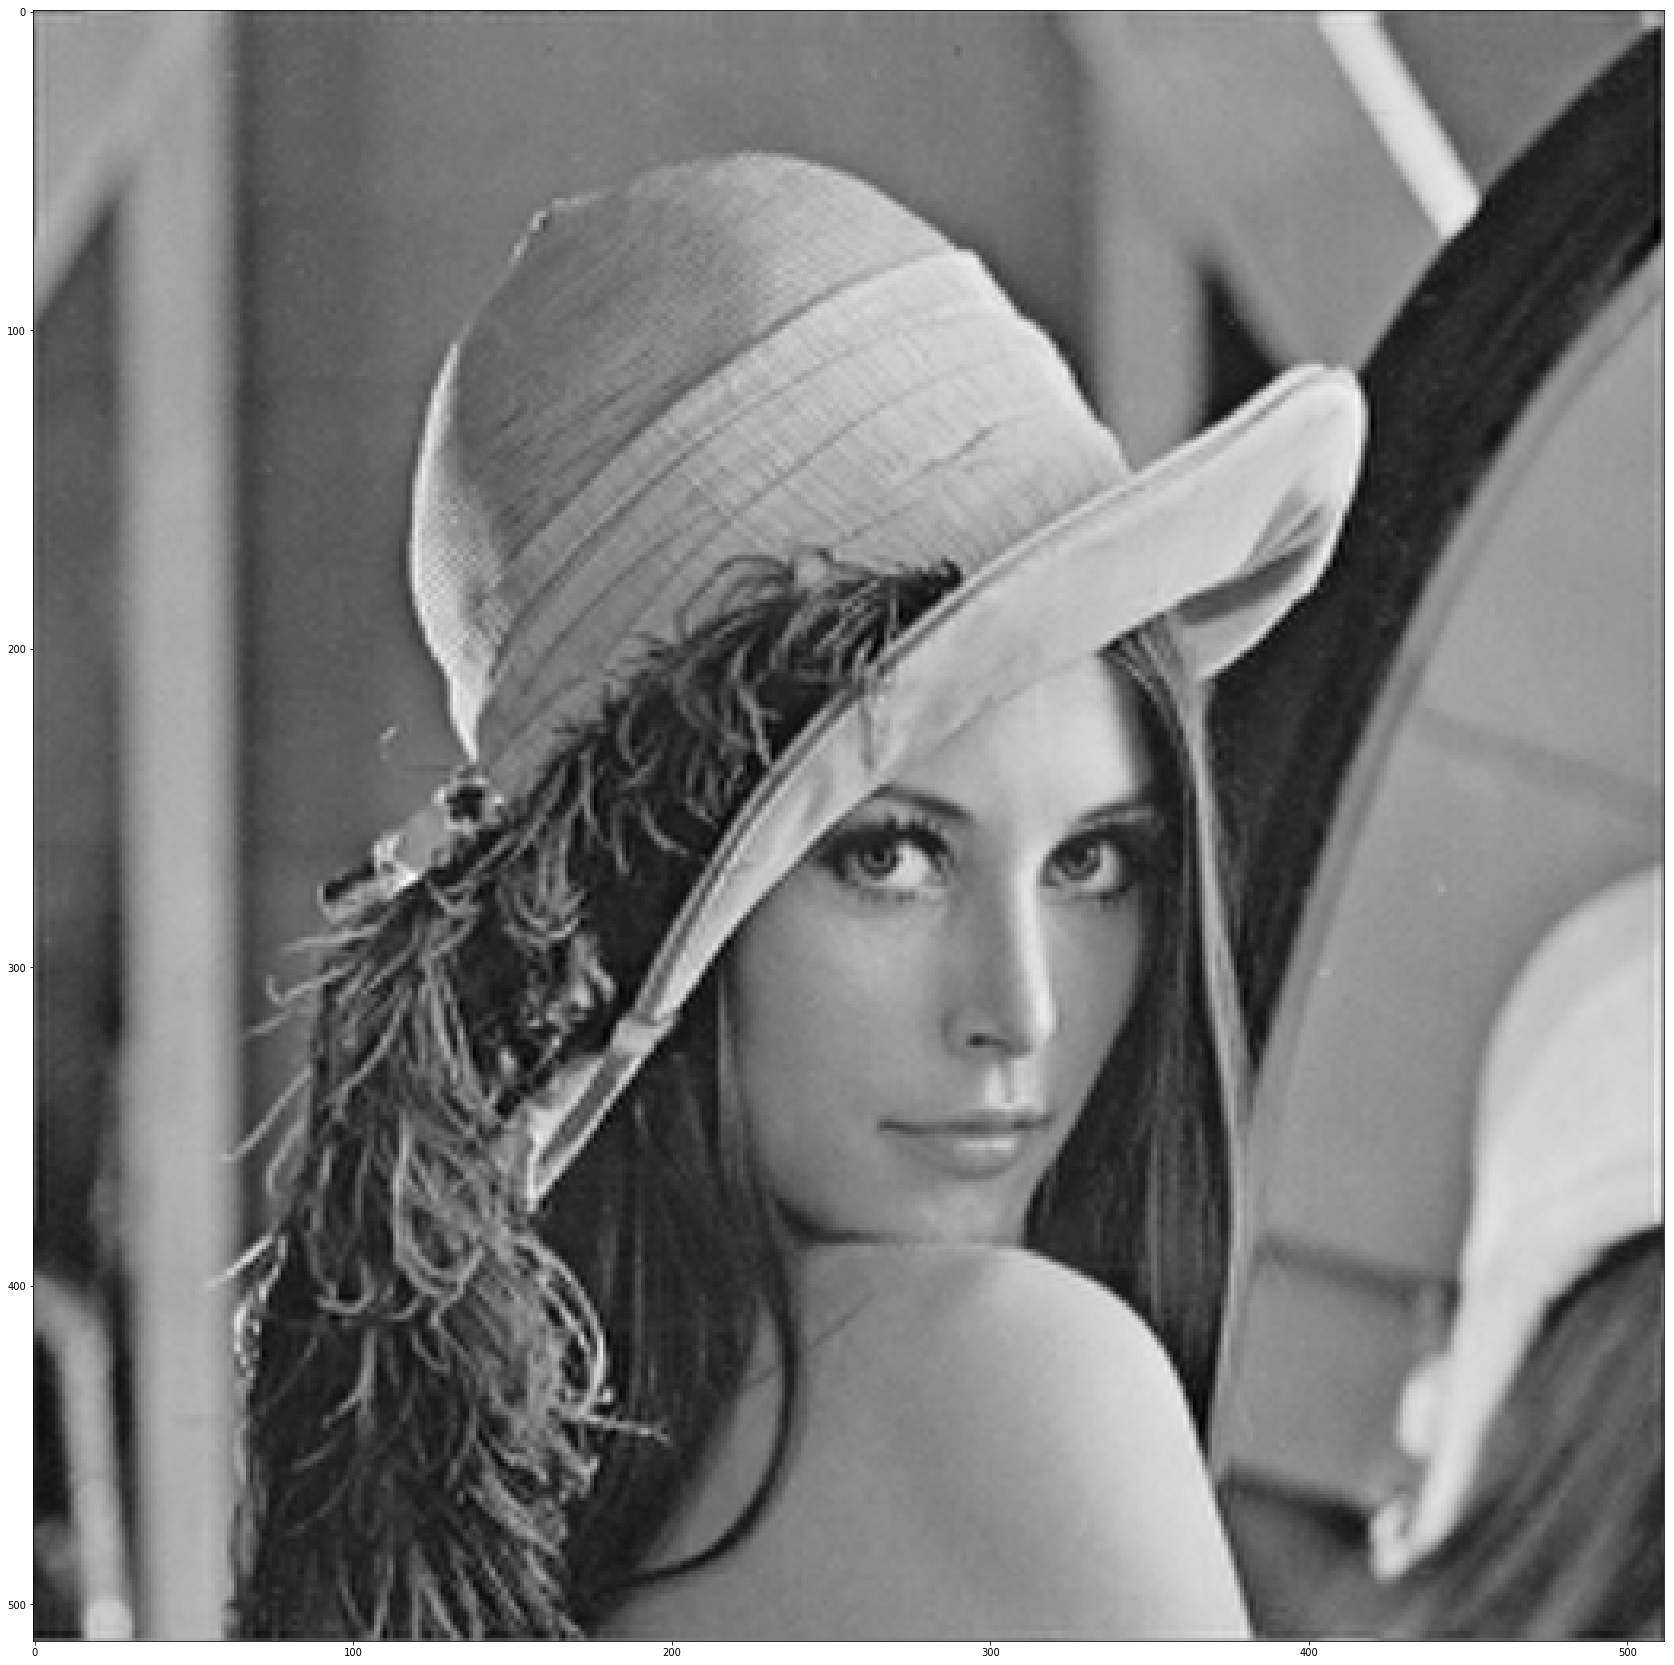

In [60]:
#i_H_[0] = estimation
sum = np.zeros(i_H_[1].shape)
for l in range(1,levels):
    sum += i_H_[l]
sum += iL
show(sum)

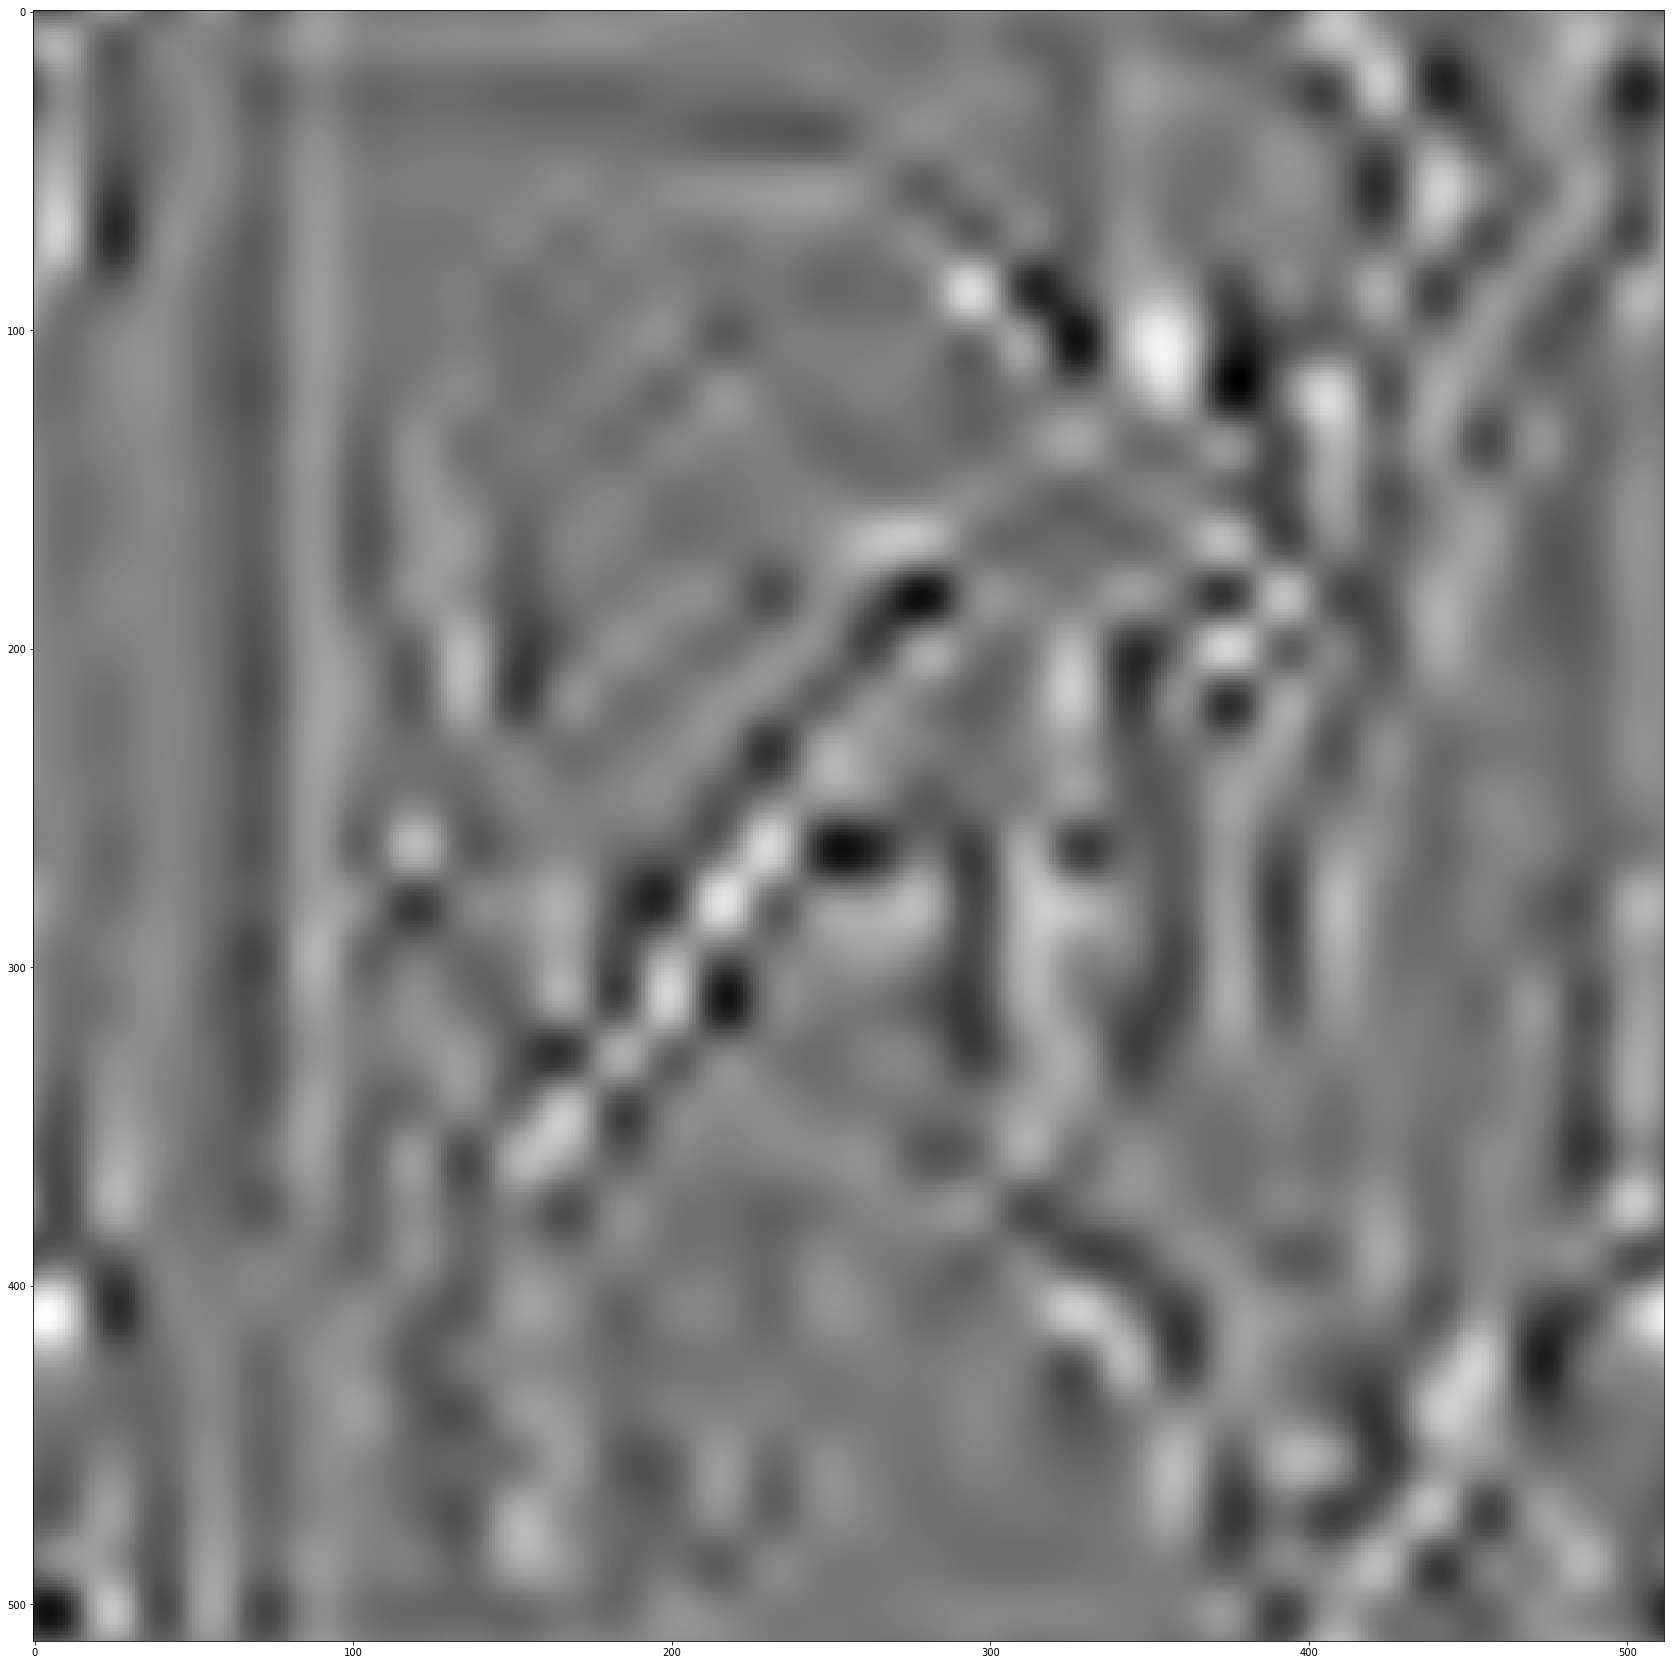

In [15]:
zero32 = np.zeros((32,32), np.float32)
zero64 = np.zeros((64,64), np.float32)
zero128 = np.zeros((128,128), np.float32)
zero256 = np.zeros((256,256), np.float32)
tmp = pywt.waverec2((_H_[4], (zero32, zero32, zero32), (zero64, zero64, zero64), (zero128, zero128, zero128), (zero256, zero256, zero256)), wavelet, mode='per')
show(tmp)

\# Applicamos ADF, sólo por ver qué pinta tiene la imagen filtrada ... luego comenzamos con el cálculo de la AD-DWT.

In [ ]:
from medpy.filter.smoothing import anisotropic_diffusion
Y_filtered = anisotropic_diffusion(Y)
plt.figure(figsize = (10,10))
plt.imshow(Y_filtered, cmap="gray")

In [ ]:
diff = Y_filtered - Y
plt.figure(figsize = (10,10))
plt.imshow(diff, cmap="gray")

\# ... y vemos que efectivamente se ha eliminado información (la imagen original y la filtrada no son iguales).

## AD-DWT (un experimento)

In [ ]:
# Por pura curiosidad miramos las subbandas ...
plt.imshow(LL, cmap='gray')

In [ ]:
plt.imshow(LH, cmap='gray')

In [ ]:
# ... y visualizamos su histograma
hist = cv2.calcHist([LH.astype('uint8')+128], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()

In [ ]:
plt.imshow(HL, cmap='gray')

In [ ]:
hist = cv2.calcHist([HL.astype('uint8')+128], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()

In [ ]:
plt.imshow(HH, cmap='gray')

In [ ]:
hist = cv2.calcHist([HH.astype('uint8')+128], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()

In [ ]:
# Definimos una matriz de ceros con las dimensiones de una subbanda. Nos va a servir para interpolar
# y para encontrar la representación no crítica (en 3 subbandas LH, HL y HH) para la subbanda H.
zero_subband = np.zeros(HH.shape, np.float64)

In [ ]:
# (2) Generamos la subbanda H (representación no crítica de LH, HL y HH).
H = pywt.idwt2((zero_subband, (LH, HL, HH)), wavelet)

In [ ]:
plt.imshow(H, cmap='gray')

In [ ]:
# (3) Generamos la versión interpolada de LL.
H_zero = (zero_subband, zero_subband, zero_subband)
LL2 = pywt.idwt2((LL, H_zero), wavelet)

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(LL2, cmap='gray')

In [ ]:
# (4) Aplicamos ADF.
LL2f = anisotropic_diffusion(LL2)

In [ ]:
# LL2 filtrada.
plt.figure(figsize = (10,10))
plt.imshow(LL2f, cmap='gray')

In [ ]:
# Imagen original.
plt.figure(figsize = (10,10))
plt.imshow(Y, cmap='gray')

In [ ]:
# Información eliminada por el filtrado.
diff = LL2 - LL2f
plt.figure(figsize = (10,10))
plt.imshow(diff, cmap='gray')

In [ ]:
# Diferencias entre la imagen original y la interpolada con la mitad de las bajas frecuencias.
diff_1 = Y - LL2
plt.imshow(diff_1, cmap='gray')

In [ ]:
# Diferencieas entre la imagen origina y la interpolada + filtrada con ADF.
diff_2 = Y - LL2f
plt.imshow(diff_2, cmap='gray')

In [ ]:
# Ambos residuos parecen idénticos, sin embargo no lo son ...
hist_1 = cv2.calcHist([diff_1.astype('uint8')+128], [0], None, [256], [0, 256])
plt.plot(hist_1, color = 'r')
hist_2 = cv2.calcHist([diff_2.astype('uint8')+138], [0], None, [256], [0, 256])
plt.plot(hist_2, color = 'g')
#plt.xlim([0,256])
#plt.ylim([0,10000])
plt.show()

In [ ]:
# En teoría, entropy_2 debería ser menor o igual que entropy_1. Esto significaría que
# el ADF mejoraría el parecido entre LL2 e Y. Sin embargo, con este filtro DWT, no es así.
# Para otras transformadas DWT sí que se cumple que entropy_2 < entropy_1. Sin
# embargo, este no es el fin último de la AD-DWT, que es reducir la entropía de H_Hf.
entropy_1 = st.entropy(hist_1)[0]
entropy_2 = st.entropy(hist_2)[0]
print("Entropy_1={} Entropy_2={}".format(entropy_1, entropy_2))

In [ ]:
# (5) Calulamos la DWT de la imagen LL2f. En los coeficientes de alta frecuencia
# (subbandas) lh, hl y hh tenemos los efectos del ADF. ll se descartará.
ll, (lh, hl, hh) = pywt.dwt2(LL2f, wavelet)

In [ ]:
# (6) Encontramos la representación no crítica de lh, hl y hh.
Hf = pywt.idwt2((zero_subband, (lh, hl, hh)), wavelet)

In [ ]:
plt.imshow(Hf, cmap='gray')

In [ ]:
plt.imshow(H, cmap='gray')

In [ ]:
# (7) restamos a la subbanda H (generada por la DWT estándar) la subbnda Hf
# (generada a partir de LL y el ADF).
H_Hf = H - Hf

In [ ]:
plt.imshow(H_Hf, cmap='gray')

In [ ]:
# Calculamos los histogramas de ambas subbandas H (la que queremos mejorar)
# y H_Hf (la mejorada).
hist_1 = cv2.calcHist([H.astype('uint8')+128], [0], None, [256], [0, 256])
plt.plot(hist_1, color = 'r')
hist_2 = cv2.calcHist([H_Hf.astype('uint8')+138], [0], None, [256], [0, 256])
plt.plot(hist_2, color = 'g')
#plt.xlim([0,256])
#plt.ylim([0,10000])
plt.show()

In [ ]:
# De nuevo, los histogramas son muy parecidos y es mejor mirar las entropías.
# Ahora sí ocurre que entropy_2 (la entropía de H_Hf) es menor que entropy_1
# (la entropía de H).
entropy_1 = st.entropy(hist_1)[0]
entropy_2 = st.entropy(hist_2)[0]
print("Entropy_1={} Entropy_2={}".format(entropy_1, entropy_2))

In [ ]:
# (8) Calculamos la representación crítica para H_Hf. 
LLf, (LHf, HLf, HHf) = pywt.dwt2(H_Hf, wavelet)

In [ ]:
# La subbanda LLf debería ser 0. Si aparece energía probablemente se deba a que 
# los filtros de la DWT introducen un error por redondeo al tratarse de filtros
# con coeficientes reales.
plt.imshow(LLf, cmap="gray")

In [ ]:
plt.imshow(LHf, cmap="gray")

In [ ]:
plt.imshow(HLf, cmap="gray")

In [ ]:
plt.imshow(HHf, cmap="gray")